#Data Cleanup and EDA

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error,classification_report,accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRFRegressor
from sklearn.ensemble import RandomForestRegressor


from tabulate import tabulate
import math
from math import sqrt
from itertools import product

In [2]:
directory = r'/content/sales_summary'
print(os.listdir(directory))

['4_APRIL23.CSV', '4_APRIL19.CSV', '6_JUNE18.CSV', '3_MAR18.CSV', '3_MAR22.CSV', '5_MAY23.CSV', '5_MAY19.CSV', '6_JUNE24.CSV', '3_MAR19.CSV', '4_APRIL24.CSV', '9_SEP20.CSV', '6_JUNE22.CSV', '3_MAR20.CSV', '8_AUG21.CSV', '7_JULY23.CSV', '1_JAN18.CSV', '10_OCT22.CSV', '1_JAN21.CSV', '12_DEC21.CSV', '11_NOV23.CSV', '12_DEC23.CSV', '4_APRIL18.CSV', '8_AUG18.CSV', '2_FEB22.CSV', '2_FEB24.CSV', '11_NOV18.CSV', '9_SEP21.CSV', '10_OCT21.CSV', '11_NOV21.CSV', '11_NOV20.CSV', '9_SEP18.CSV', '11_NOV22.CSV', '11_NOV19.CSV', '3_MAR23.CSV', '8_AUG20.CSV', '5_MAY18.CSV', '8_AUG22.CSV', '2_FEB23.CSV', '7_JULY19.CSV', '1_JAN24.CSV', '4_APRIL22.CSV', '3_MAR24.CSV', '12_DEC22.CSV', '12_DEC18.CSV', '6_JUNE20.CSV', '9_SEP22.CSV', '5_MAY22.CSV', '5_MAY21.CSV', '1_JAN23.CSV', '5_MAY20.CSV', '10_OCT19.CSV', '7_JULY18.CSV', '10_OCT20.CSV', '1_JAN19.CSV', '10_OCT23.CSV', '4_APRIL20.CSV', '1_JAN20.CSV', '4_APRIL21.CSV', '12_DEC19.CSV', '8_AUG23.CSV', '1_JAN22.CSV', '3_MAR21.CSV', '9_SEP19.CSV', '6_JUNE21.CSV', '

In [3]:
for filename in os.listdir(directory):
    if filename.endswith('.CSV'):
        # Extract month and year from the filename
        parts = filename.split('_')
        month_year = parts[-1].split('.')[0]
        print(f"Month_year: {month_year}")
        month = ''
        year = ''
        for char in month_year:
            if char.isdigit():
                year += char
            else:
                month += char
        # Create the new filename
        new_filename = f"{month}_{year}.csv"

        # Construct the full paths for the old and new filenames
        old_path = os.path.join(directory, filename)
        new_path = os.path.join(directory, new_filename)

        # Rename the file
        os.rename(old_path, new_path)
        print(f"Renamed {filename} to {new_filename}")


Month_year: APRIL23
Renamed 4_APRIL23.CSV to APRIL_23.csv
Month_year: APRIL19
Renamed 4_APRIL19.CSV to APRIL_19.csv
Month_year: JUNE18
Renamed 6_JUNE18.CSV to JUNE_18.csv
Month_year: MAR18
Renamed 3_MAR18.CSV to MAR_18.csv
Month_year: MAR22
Renamed 3_MAR22.CSV to MAR_22.csv
Month_year: MAY23
Renamed 5_MAY23.CSV to MAY_23.csv
Month_year: MAY19
Renamed 5_MAY19.CSV to MAY_19.csv
Month_year: JUNE24
Renamed 6_JUNE24.CSV to JUNE_24.csv
Month_year: MAR19
Renamed 3_MAR19.CSV to MAR_19.csv
Month_year: APRIL24
Renamed 4_APRIL24.CSV to APRIL_24.csv
Month_year: SEP20
Renamed 9_SEP20.CSV to SEP_20.csv
Month_year: JUNE22
Renamed 6_JUNE22.CSV to JUNE_22.csv
Month_year: MAR20
Renamed 3_MAR20.CSV to MAR_20.csv
Month_year: AUG21
Renamed 8_AUG21.CSV to AUG_21.csv
Month_year: JULY23
Renamed 7_JULY23.CSV to JULY_23.csv
Month_year: JAN18
Renamed 1_JAN18.CSV to JAN_18.csv
Month_year: OCT22
Renamed 10_OCT22.CSV to OCT_22.csv
Month_year: JAN21
Renamed 1_JAN21.CSV to JAN_21.csv
Month_year: DEC21
Renamed 12_DEC2

In [4]:
def load_data(csv_path):
    dataframe = pd.read_csv(rf'{csv_path}')
    return dataframe

In [5]:
def clean_data(dataframe_input):
    dataframe_input = dataframe_input.drop([0, 1, 2, 3, 4])# Dropping rows 0, 1, 2, 3 and 4
    dataframe_input = dataframe_input.dropna()
    dataframe_input = dataframe_input.reset_index(drop=True)# Resetting indexes
    dataframe_input.columns = ['product_name','quantity','amount','unit_price']

    dataframe_input = dataframe_input.dropna()
    dataframe_input = dataframe_input.reset_index(drop=True)

    cleansed_data = dataframe_input
    return cleansed_data

In [6]:
def process_files(input_dir, output_dir):
    # Get list of files in the input directory
    files = os.listdir(input_dir)

    for file in files:
        if file.endswith('.csv'):  # Assuming all files have CSV extension
            file_path = os.path.join(input_dir, file)

            # Load data
            data = load_data(file_path)
            # Clean data
            clean_data_df = clean_data(data)
            # Save cleaned data
            output_file_path = os.path.join(output_dir, f"{file}")
            clean_data_df.to_csv(output_file_path, index=False)
            print(f"Cleaned data saved to: {output_file_path}")

In [7]:
input_directory = "/content/sales_summary"
output_directory = "/content/sales_summary_cleaned"

# Process files
process_files(input_directory, output_directory)

Cleaned data saved to: /content/sales_summary_cleaned/APRIL_22.csv
Cleaned data saved to: /content/sales_summary_cleaned/JUNE_21.csv
Cleaned data saved to: /content/sales_summary_cleaned/APRIL_23.csv
Cleaned data saved to: /content/sales_summary_cleaned/MAR_20.csv
Cleaned data saved to: /content/sales_summary_cleaned/APRIL_18.csv
Cleaned data saved to: /content/sales_summary_cleaned/AUG_19.csv
Cleaned data saved to: /content/sales_summary_cleaned/MAY_18.csv
Cleaned data saved to: /content/sales_summary_cleaned/FEB_21.csv
Cleaned data saved to: /content/sales_summary_cleaned/AUG_21.csv
Cleaned data saved to: /content/sales_summary_cleaned/NOV_20.csv
Cleaned data saved to: /content/sales_summary_cleaned/JULY_19.csv
Cleaned data saved to: /content/sales_summary_cleaned/OCT_20.csv
Cleaned data saved to: /content/sales_summary_cleaned/FEB_23.csv
Cleaned data saved to: /content/sales_summary_cleaned/NOV_18.csv
Cleaned data saved to: /content/sales_summary_cleaned/SEP_19.csv
Cleaned data save

In [8]:
def merge_monthly_data(directory:str) -> pd.DataFrame:
    merged_data = None  # Initialize merged_data as None

    for file in os.listdir(directory):
        if file.endswith('.csv'):
            file_path = os.path.join(directory, file)
            month_year = file.split('.')[0]  # Extract month and year from filename
            if '_' in month_year:  # Ensure that month_year contains an underscore
                month, year = month_year.split('_')  # Split the filename into month and year

                # Load CSV into DataFrame
                df = pd.read_csv(file_path)

                # Extract existing column names
                columns = df.columns.tolist()
                # Assume the columns containing quantity and amount have names containing these strings
                quantity_column = [col for col in columns if 'quantity' in col.lower()][0]
                amount_column = [col for col in columns if 'amount' in col.lower()][0]
                unit_price_column = [col for col in columns if 'unit_price' in col.lower()][0]


                # Rename columns to include month and year
                df.rename(columns={quantity_column: f'{month}_{year}_quantity',
                                   amount_column: f'{month}_{year}_amount',
                                   unit_price_column: f'{month}_{year}_unit_price'
                                   }, inplace=True)

                # Group by product_name and sum the quantities and amounts
                df_grouped = df.groupby('product_name').sum().reset_index()

                # Merge with main DataFrame based on product_name, filling missing values with zeros
                if merged_data is None:
                    merged_data = df_grouped.copy()  # If merged_data is None, assign the first DataFrame directly
                else:
                    merged_data = pd.merge(merged_data, df_grouped, on='product_name', how='outer').fillna(0)

    return merged_data

# Directory containing monthly CSV files
data_directory = "/content/sales_summary_cleaned"

# Merge monthly data
merged_data = merge_monthly_data(data_directory)

# Save merged data to a new CSV file
merged_data.to_csv("/content/merged_data.csv", index=False)

# Display the merged DataFrame
print(merged_data.shape)

print(merged_data.head())

(1316, 235)
       product_name  APRIL_22_quantity  APRIL_22_amount  APRIL_22_unit_price  \
0    10KG BABA GOLD                5.0          2783.35               556.67   
1     10KG SPOORTHI                6.0          3255.00               542.50   
2       3ROSES 100G                3.0           234.00                78.00   
3       3ROSES 250G                4.0           730.00               182.50   
4  5LIT SUNPURE CAN               15.0         14376.90               958.46   

   JUNE_21_quantity  JUNE_21_amount  JUNE_21_unit_price  APRIL_23_quantity  \
0               4.5        2505.015              556.67                4.0   
1               5.5        2983.750              542.50                0.0   
2               2.5         195.000               78.00                3.0   
3               3.5         638.750              182.50                3.0   
4              14.5       13897.670              958.46                2.0   

   APRIL_23_amount  APRIL_23_unit_pric

In [9]:
retail_store_data = pd.read_csv(r'merged_data.csv')

In [10]:
retail_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Columns: 235 entries, product_name to JULY_21_unit_price
dtypes: float64(234), object(1)
memory usage: 2.4+ MB


In [11]:
retail_store_data.head()

,product_name,APRIL_22_quantity,APRIL_22_amount,APRIL_22_unit_price,JUNE_21_quantity,JUNE_21_amount,JUNE_21_unit_price,APRIL_23_quantity,APRIL_23_amount,APRIL_23_unit_price,...,JAN_19_unit_price,MAY_21_quantity,MAY_21_amount,MAY_21_unit_price,MAR_18_quantity,MAR_18_amount,MAR_18_unit_price,JULY_21_quantity,JULY_21_amount,JULY_21_unit_price
0,10KG BABA GOLD,5.0,2783.35,556.67,4.5,2505.015,556.67,4.0,2340.0,585.0,...,572.0,6.5,3893.500,599.00,6.0,3320.0,553.33,19.0,5644.12,297.06
1,10KG SPOORTHI,6.0,3255.00,542.50,5.5,2983.750,542.50,0.0,0.0,0.0,...,0.0,7.5,4404.975,587.33,3.0,1640.0,546.67,0.0,0.00,0.00
2,3ROSES 100G,3.0,234.00,78.00,2.5,195.000,78.00,3.0,249.0,83.0,...,83.0,2.5,217.500,87.00,2.0,155.0,77.50,4.0,350.00,87.50
3,3ROSES 250G,4.0,730.00,182.50,3.5,638.750,182.50,3.0,621.0,207.0,...,205.0,3.5,735.000,210.00,0.0,0.0,0.00,4.0,868.00,217.00
4,5LIT SUNPURE CAN,15.0,14376.90,958.46,14.5,13897.670,958.46,2.0,1420.0,710.0,...,782.0,2.5,1735.000,694.00,22.0,18580.0,844.55,7.0,4438.00,634.00


#Arrange the columns in the df

In [12]:
desired_columns_order = ['product_name',
    'JAN_18_quantity', 'JAN_18_amount',
    'FEB_18_quantity', 'FEB_18_amount',
    'MAR_18_quantity', 'MAR_18_amount',
    'APRIL_18_quantity', 'APRIL_18_amount',
    'MAY_18_quantity', 'MAY_18_amount',
    'JUNE_18_quantity', 'JUNE_18_amount',
    'JULY_18_quantity', 'JULY_18_amount',
    'AUG_18_quantity', 'AUG_18_amount',
    'SEP_18_quantity', 'SEP_18_amount',
    'OCT_18_quantity', 'OCT_18_amount',
    'NOV_18_quantity', 'NOV_18_amount',
    'DEC_18_quantity', 'DEC_18_amount',
    'JAN_19_quantity', 'JAN_19_amount',
    'FEB_19_quantity', 'FEB_19_amount',
    'MAR_19_quantity', 'MAR_19_amount',
    'APRIL_19_quantity','APRIL_19_amount',
    'MAY_19_quantity', 'MAY_19_amount',
    'JUNE_19_quantity', 'JUNE_19_amount',
    'JULY_19_quantity', 'JULY_19_amount',
    'AUG_19_quantity','AUG_19_amount',
    'SEP_19_quantity', 'SEP_19_amount',
    'OCT_19_quantity', 'OCT_19_amount',
    'NOV_19_quantity', 'NOV_19_amount',
    'DEC_19_quantity', 'DEC_19_amount',
    'JAN_20_quantity', 'JAN_20_amount',
    'FEB_20_quantity', 'FEB_20_amount',
    'MAR_20_quantity', 'MAR_20_amount',
    'APRIL_20_quantity','APRIL_20_amount',
    'MAY_20_quantity', 'MAY_20_amount',
    'JUNE_20_quantity', 'JUNE_20_amount',
    'JULY_20_quantity', 'JULY_20_amount',
    'AUG_20_quantity','AUG_20_amount',
    'SEP_20_quantity', 'SEP_20_amount',
    'OCT_20_quantity', 'OCT_20_amount',
    'NOV_20_quantity', 'NOV_20_amount',
    'DEC_20_quantity', 'DEC_20_amount',
    'JAN_21_quantity', 'JAN_21_amount',
    'FEB_21_quantity', 'FEB_21_amount',
    'MAR_21_quantity', 'MAR_21_amount',
    'APRIL_21_quantity','APRIL_21_amount',
    'MAY_21_quantity', 'MAY_21_amount',
    'JUNE_21_quantity', 'JUNE_21_amount',
    'JULY_21_quantity', 'JULY_21_amount',
    'AUG_21_quantity','AUG_21_amount',
    'SEP_21_quantity', 'SEP_21_amount',
    'OCT_21_quantity', 'OCT_21_amount',
    'NOV_21_quantity', 'NOV_21_amount',
    'DEC_21_quantity', 'DEC_21_amount',
    'JAN_22_quantity', 'JAN_22_amount',
    'FEB_22_quantity', 'FEB_22_amount',
    'MAR_22_quantity', 'MAR_22_amount',
    'APRIL_22_quantity','APRIL_22_amount',
    'MAY_22_quantity', 'MAY_22_amount',
    'JUNE_22_quantity', 'JUNE_22_amount',
    'JULY_22_quantity', 'JULY_22_amount',
    'AUG_22_quantity', 'AUG_22_amount',
    'SEP_22_quantity', 'SEP_22_amount',
    'OCT_22_quantity', 'OCT_22_amount',
    'NOV_22_quantity', 'NOV_22_amount',
    'DEC_22_quantity', 'DEC_22_amount',
    'JAN_23_quantity', 'JAN_23_amount',
    'FEB_23_quantity', 'FEB_23_amount',
    'MAR_23_quantity', 'MAR_23_amount',
    'APRIL_23_quantity','APRIL_23_amount',
    'MAY_23_quantity', 'MAY_23_amount',
    'JUNE_23_quantity', 'JUNE_23_amount',
    'JULY_23_quantity', 'JULY_23_amount',
    'AUG_23_quantity', 'AUG_23_amount',
    'SEP_23_quantity', 'SEP_23_amount',
    'OCT_23_quantity', 'OCT_23_amount',
    'NOV_23_quantity', 'NOV_23_amount',
    'DEC_23_quantity', 'DEC_23_amount',
    'JAN_24_quantity', 'JAN_24_amount',
    'FEB_24_quantity', 'FEB_24_amount',
    'MAR_24_quantity', 'MAR_24_amount',
    'APRIL_24_quantity','APRIL_24_amount',
    'MAY_24_quantity', 'MAY_24_amount',
    'JUNE_24_quantity', 'JUNE_24_amount'
]

In [13]:
retail_store_data = retail_store_data.reindex(columns=desired_columns_order)# Reindex the DataFrame columns
# unique_product_list = retail_store_data['product_name'].unique()

In [14]:
retail_store_data.to_csv("/content/retail_store_data.csv", index=False)

In [15]:
quantity_columns = [col for col in retail_store_data.columns if 'quantity' in col]
amount_columns = [col for col in retail_store_data.columns if 'amount' in col]
# Calculate total quantities and amounts
retail_store_data['total_quantity'] = retail_store_data[quantity_columns].sum(axis=1)
retail_store_data['total_amount'] = retail_store_data[amount_columns].sum(axis=1)

In [16]:
retail_store_data.head()

,product_name,JAN_18_quantity,JAN_18_amount,FEB_18_quantity,FEB_18_amount,MAR_18_quantity,MAR_18_amount,APRIL_18_quantity,APRIL_18_amount,MAY_18_quantity,...,MAR_24_quantity,MAR_24_amount,APRIL_24_quantity,APRIL_24_amount,MAY_24_quantity,MAY_24_amount,JUNE_24_quantity,JUNE_24_amount,total_quantity,total_amount
0,10KG BABA GOLD,6.0,3340.0,0.0,0.0,6.0,3320.0,3.0,1670.0,15.0,...,1.0,680.0,0.0,0.0,0.0,0.0,0.00,0.00,466.60,250215.897
1,10KG SPOORTHI,7.0,3790.0,7.0,3770.0,3.0,1640.0,4.0,2170.0,9.0,...,1.0,700.0,0.0,0.0,0.0,0.0,0.00,0.00,226.60,128951.105
2,3ROSES 100G,4.0,291.0,0.0,0.0,2.0,155.0,1.0,78.0,11.0,...,0.0,0.0,6.0,528.0,12.0,1056.0,10.89,958.32,291.49,23901.760
3,3ROSES 250G,1.0,180.0,3.0,570.0,0.0,0.0,2.0,365.0,11.0,...,1.0,217.0,2.0,432.0,12.0,2604.0,3.89,855.80,254.49,51241.320
4,5LIT SUNPURE CAN,7.0,4845.0,13.0,9095.0,22.0,18580.0,13.0,12460.0,16.0,...,4.0,2425.0,4.0,2370.0,11.0,6545.0,0.00,0.00,715.10,568590.350


In [17]:
retail_store_data.shape

(1316, 159)

#Categorise the items


In [18]:
# List of product names to categorize as 'Rice'
rice_product_names = [
    '10KG BABA GOLD', '10KG SPOORTHI', 'BROKEN RAW', 'BROWN RICE', 'BULLET RICE', 'BULLET SONA',
    'DOSA RICE (FINE)', 'FINE SONA', 'HAMSA RICE', 'HMT OLD', 'IDLY RICE', 'IND CLASIC',
    'INDIA GATE DUBAR', 'KESAR KLLI', 'KOLAM 10KG', 'KOLAM OLD', 'KV GOLD 26KG', 'LONG BODY',
    'OLD SONA', 'PONNY SPL', 'RAJMOUDI RICE', 'RAW SONA', 'RED BOILED', 'RED RAW', 'ROYAL SONA',
    'SUPER SONA', 'WHITE TASTY', 'ZEERA RICE FINE', 'BASMATHI PUALO', 'BASMATHI RICE', 'BEST SONA',
    'BROKEN RICE RAW', 'BROKEN RICE STEA', 'HMT SPL', 'INDIA GATE (DUBA', 'KESAR KALI RICE',
    'KOLOM STEAM RICE', 'SPL SONA', 'VRT SONA', 'BABA BLK BULET', 'HMT SONA', 'KOLOM ST RICE',
    'A ONE SONA', 'DOSA RICE FINE', 'HMT', 'SONA BOILED', 'BABA LACHKORI', 'ROYAL BULLET 26',
    'BABA SILVER 10KG', 'KOLAM FINE', '10KG B L RICE', 'NO 1 SONA', 'INDIA GATE CLASS', 'BULLET 10KG',
    'JMR RICE', 'PAVAN RICE 30KG', 'INIA GATE ROZ', 'RICE NK SPL'
]

# List of beverages product names
beverages_product_names = [
    '3ROSES 100G', '3ROSES 250G', '3ROSES 500G', '3ROSES NC 250G', 'ANNAPURNA COFFE', 'BOOST 200G',
    'BOOST 200GM JAR', 'BOOST 500G', 'BOOST 500G J', 'BOOST 5RS', 'BOURN VITA 500G', 'BRU 10RS',
    'BRU 2RS', 'COTHAS 100G', 'COTHAS 200G', 'COTHAS 500G', 'DABUR HONEY 50G', 'G LABLE 100G',
    'HORLICKS 1KG', 'HORLICKS 200G (B', 'HORLICKS 500 JUN', 'HORLICKS 500G', 'HORLICKS 500G J',
    'K DEVAN 100GM', 'K DEVAN 250GM', 'K DEVAN 500GM', 'LEVISTA 2RS', 'MTR BADAM POW 20',
    'MTR BADAM POW 50', 'RED GOLD 1KG', 'RED LABEL 100G', 'RED LABEL 250G', 'RED LABEL 500G',
    'RED LABEL NC 250', 'RED LABELE NC 10', 'RED LABLE 10RS', 'SUNRISE 100G', 'SUNRISE 2RS',
    'TAJ 100G', 'TAJ 250G', 'TATA GOLD 100', 'TATA GOLD 100G', 'TATA GOLD 250G', 'AA BADAM POWDER',
    'CONTNENTEL 200GM', 'HORLICKS 5RS', 'K.DEVAN 250GM', 'PRAKASH TEA 250G', 'BOURN VITA 750G',
    'DABUR HONEY 100G', 'DABUR HONEY 20RS', 'DABUR HONEY 250G', 'HORLICKS 200G', 'MTR BADAM POW 10',
    'SUNRISE 50G', 'TETLEY G TEA', 'MALGUDI 40RS', 'MALGUDI 50RS', '3ROSES NAT 250G', 'BRU 3RS',
    'BRU 5RS', 'DABUR 1=1', 'DABUR HONEY 1KG', 'K DEVAN 1KG', 'K.DEVAN 100GM', 'LIPTON G TEA',
    'SUNRISE 10RS', 'SUNRISE 200G', '3ROSE 50GM', 'BRU 500G', 'CM COFFE 250GM', 'G LABLE 500G',
    'LION HONEY  1=1', 'RED LABLE 1KG NC', '3ROSES NC 100G', 'BOOST 1KG', 'CK COFFE 100GM',
    'G LABLE 200G', 'HORLICKS WOMEN 5', 'BRU 50G', 'SUNRISE 5RS', 'TATA GOLD NC', 'BOOST 750G',
    'RED LABEL NC 500', 'CM COFFE 100GM', 'HORLICKS JUNI 50', 'PRAKASH TEA 100G', 'BRU 1RS',
    'TAJ 500G', 'COTHAS 50GM', 'HORLICKS 500G (B', 'PRAKASH TEA 10RS', 'DABUR HONET 500G',
    'PRAKASH TEA 500', 'RED LEBAL 200GM', 'LIPTOM TEA 100BA', 'TETLEY 75RS', 'SUNRISE 100 J',
    'BOOST 750GM', 'BRU 200G', 'RED LABLE 1KG', 'SUNRISE 50G JAR'
]

# List of dry fruits product names
dry_fruits_product_names = [
    'BADAM SEEDS', 'BADAM SEEDS 100G', 'BADAM SEEDS 250G', 'CASHEW FULL', 'CASHEW JH', 'CASHW 250GM',
    'CASHW FINE 100GM', 'DRY GRAPES 100GM', 'DRY GRAPES 250GM', 'DRY GRAPES L', 'KARJURA 250GM',
    'KARJURA 500GM', 'LION DATES 250GM', 'LION DATES ARABI', 'PISTA PLAIN', 'PUMKIN SEEDS', 'WALNET 200GM',
    'ANJURA', 'CASEW JH 10RS', 'DRY GRAPES', 'DRY GRAPES 10RS', 'KARJURA', 'PISTA 200GM', 'NUTS 40RS',
    'BABAY CASHEW', 'BADAM SEEDS 10RS', 'DRY GRAPES BLACK', 'LION DATES 500', 'BAJAJ ALMOND',
    'DRY GRAPES BLK', 'GRB BADAM 1KG', 'BABY CASHW', 'BAJAJ ALMOND B'
]

# List of flour product names
flour_product_names = [
    'ASH ATTA 10KG.', 'ASH ATTA 1KG', 'ASH ATTA 5KG', 'ASH M 10KG', 'ASH MULTI 5KG','ASH SELECT 5KG',
    'ATTA SPL', 'B L GFLOOR 500', 'B L MAIDA 1KG', 'B L MAIDA 500GM', 'B L RAGI FLOOR', 'B L RICE FLOOR',
    'CORN FLOOR 100GM', 'G FLOUR', 'MAIDA SPL', 'RICE FLOOR', 'ANNAPURNA ATTA 1', 'ASH ATTA 2KG',
    'ASH MULTI 1KG', 'B L RAGI FLOOR 1', 'CORN FLOUR', 'PIL ATTA 1KG', 'RAGI FLOUR', 'RAGI FLOUR 1KG',
    'RICE FLOOR BL', 'VIJAY RICE FLOOR', 'VIJAY RAGI FLOOR', 'TATA G FLOOR', 'RICE FLOUR', 'ANNAPURNA ATTA 5',
    'ANANASFLOUR 10RS', 'B L ATTA 5KG', 'B L RICE FLOOR 1', 'PIL ATTA 10KG', 'PIL ATTA 5KG',
    'VIVA ATTA 10KG', 'B L ATTA 10KG', 'BTC GOLD 10KG', 'RICE FLOUR 1KG (', 'JOLA POW 1KG','KRISHNA ATTA 5KG'
]

# List of lentils product names
lentils_product_names = [
    'AVALAKKI', 'B GRAM', 'B L AVALAKI', 'B L AVALAKI M', 'B L BANSI 1KG', 'B L CHIROTI 500G',
    'B L IDLY RAVA', 'B L RAVA ROST', 'BALLAR DAL', 'CHARPAPPU', 'CONGRAS GN', 'FRIED GRAM',
    'GN SEEDS', 'GRAM DALL', 'GREEN MOONG', 'GREEN PEAS', 'HORSE GRAM', 'JAVE WHEAT', 'JEENI 1KG',
    'JOLA', 'KABUL', 'LOBO', 'MASUR DALL', 'MOONG DALL', 'MOTTU', 'RAGI', 'RAVA B', 'RAVA(C)',
    'RAVA(M)', 'SHIVALING FINE', 'SOYA BEAN', 'SOYA CHUNKS 200G', 'TATA AVALAKI 500', 'TATA AVALAKI P',
    'URID DALL', 'URID GOLA', 'WHEAT FINE', 'AVALAKKI (P)', 'B DALL', 'B L BANSI RAVA', 'B L DAL 500GM',
    'BALLAR', 'BROKEN WHEAT', 'GANESH DALL', 'IDLY RAVA', 'IDLY RAVA BL', 'LOBA [W]', 'M CHILAKA',
    'MASUR BLACK', 'NAVANE', 'RAJMA RED', 'SHIVALINGA DAL', 'VIJAY IDLY RAVA', 'AVALAKKI 500GM P',
    'CORN LOOSE', 'URID BLK', 'VIJAY AKKI TARI', 'RAVA B PKT', 'IND RAGI', 'IND RAGI SPL',
    'SOYA CHUNKS L', 'BARAGU MILETS', 'KODO MILET', 'VIJAY UPMA RAVA', 'GN SEEDS R', 'AVALAKKI (M)',
    'B BANSI RAVA'
]

#List of Instant Food product names
instant_food_product_names =[
    'ACT 10RS', 'ANIL RICE 500GM', 'ANIL SEMIYA 200M', 'ANIL SEMIYA 500G', 'APLA 30RS', 'APLA 70RS',
    'BAMBINO 500GM', 'IND DOAA MIX', 'KIS JAM 500', 'KIS KETCUP', 'KNOOR SOUP 60RS', 'KNOOR SOUP 70',
    'MACRONI LOOSE', 'MAGGI 12RS', 'MAGGI 4PACK', 'MAGGI 8PACK', 'MAGGI MASALA 5RS', 'MAZA APALA',
    'MAZA APALA MASAL', 'MTR JAMUN OFFRR', 'MTR PAYASA 100GM', 'MTR RAVAIDLY 1KG', 'MTR SEMIYA 200GM',
    'MTR SEMIYA 500G', 'MTR SEMIYA 900G', 'MTR SEMIYA R 500', 'NOODLES PLAIN', 'PEDI SURE 1KG',
    'PICKELE 5KG', 'PICKLE 250GM', 'PURI 500GM', 'SANDIGE 1KG', 'SWA RAVA IDLY 1=', 'YIPPEE 12RS',
    'AA APPALA', 'AA RAVA IDLY 1=1', 'APLA MASALA 70RS', 'BADAM POWDER 1=1', 'GRB BADAM 200GM',
    'GRB JAMUN 1=1', 'KRISHNA APLA 30R', 'KUSHAL APPLA', 'MEAL MAKER', 'MTR BISIBELE 100',
    'MTR RAVAIDLY 500', 'MTR ROAST SEMIYA', 'PICKLE 20RS', 'PICKLE 60RS', 'POPCORN 10RS',
    'QUKER OATS 500GM', 'SOYA SAUCE', 'TEJU PICKLE 45RS', 'TEJU PICKLE 50RS', 'TOMOTO SAUCE',
    'YIPPE NOODLES 8P', 'YIPPEE 45RS', 'ANIL BROKEN WHEA', 'ANIL RAGI 500GM', 'JEENI 500G',
    'MTR PAYASA MIX 1', 'OATS 15RS', 'PASTA 25RS', 'PICKLE 50RS', 'QUKER OATS 400GM', 'TOPRAMEN CURRY',
    'AA PANIPURI', 'ACT 15RS', 'ASH SEMIYA 500', 'ASH SEMIYA R', 'MTR PAYASA 180G', 'PICKEL 1KG',
    'PICKLE 55RS', 'SUNDROP CHOCAS', 'TEJU BADAM 1=1', 'AA PICKLE 1=1', 'MAGGI 6PACK', 'PICKLE AMLA',
    'POPCORN 22RS', 'ANILL APLAM B', 'JEENI SPL', 'SAFOLA TASTY', 'SANDIGE 500GM', 'MAGGI SAUCE 200',
    'RASNA POWDER', 'SAFOLA OATS 16RS', 'AA HEALTH MIX', 'ANIL RICE SEMIYA', 'APLA 60RS', 'CHILLY SAUCE',
    'LIJAT PAPAD', 'MTR JAMUN 500G', 'NOODELS PLAIN', 'PICKLE 45RS', 'SWA PICKLE 18RS', 'ACT 33RS',
    'CAKE MIS 59RS', 'PURI LOSE', 'BAKING POW 100G', 'MTR ROASTED SEMI', 'TANG ORANGE 500G', 'ANIL APLA',
    'OATS 25RS', 'APLA MADURAI', 'JEENI WOMENS', 'SAFOLA OATS 1KG', 'GRB JAMUN 100GM', 'KRISHNA APLA 60R',
    'K CHOCOS', 'PEDIASURE 400GM', 'QUAKAR OATS 1KG'
]

#List of oils and ghee product names
oil_and_ghee_product_names = [
    '15 LTR SUNPURE', '5LIT SUNPURE CAN', '5LR FORTUNE', 'AMRUTHAM OIL 1LR', 'DALDA 1LR', 'DALDA 200',
    'DHEEPAM 1LR B', 'DHEPAM OIL 500ML', 'EMAMI OIL', 'FIONA OIL', 'FORTUNE MUS OIL', 'FORTUNE OIL',
    'FORTUNE RC', 'FREEDOM SF OIL', 'GEMINI OIL 1LT', 'GINGELLY OIL 1LI', 'GINGELLY OIL 500',
    'GOLD WINNER 1LR', 'GRB 100ML', 'GRB 1LTR', 'GRB 200ML B', 'GRB 500ML', 'GRB 500ML B',
    'GRB 50ML', 'IDAYAM OIL', 'KRISHNA 500ML', 'NANDINI 1LR', 'NANDINI 500ML', 'NANDINI GHEE 200',
    'P CHUTE 100ML', 'P CHUTE 1LR', 'P CHUTE 200ML', 'P CHUTE 300ML', 'P CHUTE 600ML',
    'P CHUTE JASMINE', 'RUCHI GOLD', 'SAFOLA GREEN', 'SUNPURE 1LT', 'VOM GN', 'VVD OIL 500ML',
    '5LR GOLD WINNER', 'AMRUTHAM OIL 500', 'DABUR AMLA 100ML', 'DHEEPAM 1LR', 'DHEEPAM 1LTR',
    'FORTUNE M OIL200', 'GINGELY OIL 200M', 'GRB 100ML B', 'GRB 10RS', 'GRB 200ML', 'KRISHNA 100J',
    'NANDINI 200ML', 'SAFFOLA GOLD  1L', 'SUN POWER 500ML', 'SUNPURE 500ML', 'SUNPURE RB OIL 1',
    'VOM GN OIL 1LT', '15KG SUNPURE TIN', 'FORTUNE 500ML', 'KLF 500ML', 'SUNPURE 2LR',
    '15 LTR GOLDWINNE', 'CASTROIL 200ML', 'CASTROIL 500ML', 'DALDA 200ML', 'GRB PU 10RS', 'IDAYAM OIL 500ML',
    'KRISHNA 100ML', 'KRISHNA 200ML', '5LTR GEMINI', 'CASTROL OIL 50ML', 'DHEEPAM 1LTR P',
    'FREEDOM 10LR', 'KNG GR OIL', 'KPL 500ML', 'PANCHAMI 500MLB', 'PANCHAMI OIL 1LB', '15KG DHEPA OIL',
    'ASH GHEE 200ML J', 'FORTUNE 10KG', 'SUNDROP BUTTER 2', 'VOM 15KG', 'CASTROIL 100ML',
    'P CHUTE 500ML', 'SAFOLA GOLD', 'DHEEPAM 1LT BOTT', 'FREEDOM OIL 1J', 'KRISHNA GHEE 100',
    'KRISHNA GHEE 500', 'SUNDROP 1LIT', 'SUNRISE 1RS', 'SWA GHEE 200J', 'SAFAL 1LIT', 'SUNPURE 1BTL',
    '5 LTR COCONUT OI', 'KRISHNA GHEE 200', 'SUN PREMIUM 1LR', 'ASWINI OIL 200ML', 'ALAYAM 5LR',
    'OLEEV B 1LIT', 'KRISHNA 500ML J', 'GOLD WINER GR', 'KRISHA 50ML', 'SUNDROP BUTTER 1',
    'KRISHA GHEE 50ML', 'GOLD WINNER 200M'
]

#List of puja items product names
puja_items_product_names =[
    'CAMPAR 150RS', 'CAMPAR 20RS', 'CAMPAR JAR', 'CAMPOPR 70RS', 'CAMPOR 250GM', 'CANDLE 5RS', 'CHETA MBOX',
    'CYCLE 20RS', 'CYCLE 50RS', 'CYCLE DOOPA 72', 'DOOPA 15RS', 'HOMELITE', 'KUNKMA 10RS', 'MANGALDEEP 50RS',
    'SHANTALA SMART', 'SWARNA CHAMPA 60', 'ULLAS 110RS', 'ULLAS 60RS', 'VASU BIG', 'CAMPAR 50RS', 'CAMPOPR 75RS',
    'CYCLE 10RS', 'MANGAL DEEP DOOP', 'BATHI', 'BLACK STONE 55RS', 'CAMPAR 100RS', 'MY SANDEL DOOPA',
    'SHANTALA 40RS', 'CAMPAR 50G', 'SWARNA CHAMPA 50', 'MANGALA DEEP POU', 'UJALA BIG', 'UJALA S',
    'VASU 20RS', 'CAMPOPR 100RS', 'SWARNA CHAMPA 12', 'TAJ MAHAL 10RS', 'BLOCK STONE 55RS'
]

#List of spices product names
spices_product_names = [
    'AA 10RS', 'AA BIRIYANI 50GM', 'AA CHIKEN 100GM', 'AA CHIKEN 10RS', 'AA CHIKEN 500GM', 'AA CP 100GM',
    'AA CP 500GM', 'AA GARAM 50GM', 'AA JEERA PO 50GM', 'AA PEPPER PO 50G', 'AA SP 10RS', 'AA TP 500GM',
    'AASHIRVAD SALT', 'ANN.ROCKSALT 1KG', 'ANNAS FLOWER', 'B TILL 100', 'CHILLI [B]', 'CHILLI [G]',
    'CHILLI [M]', 'COPRA', 'DHANIYA FINE', 'EV CHAT 50GM', 'EV CHIKEN 100', 'EV CHOLE 100',
    'EV TIKALAL 100', 'FLACK SEEDS', 'GARLIC PASTE 200', 'GINGER GARLIC 5R', 'GRB PULIOGARE 10',
    'GRB TP 100GM', 'HING 10RS', 'JAKAI 10RS', 'JAPATRE L', 'JEERA 50GM', 'JEERA FINE 100G', 'JEERA FINE 250G',
    'JEERA LOOSE', 'KASTURI METHI 10', 'KASURI METHY 25G', 'L G PKT', 'L G POWDER 50GM', 'LAVANG 10GM',
    'LAVANG L', 'M MOGGU', 'METHI 100G', 'METHI L', 'MTR 10RS', 'MTR BISIBELE 10R', 'MTR CP 100GM',
    'MTR CP 500G', 'MTR DP 100G', 'MTR DP 500GM', 'MTR GARAM 50GM', 'MTR PEPPER POW 5', 'MTR PULIO 12RS',
    'MTR PULIOGARE 10', 'MTR PULIOGARE 20', 'MTR RASAM 200G', 'MTR SP 100G', 'MTR SP 200G', 'MTR T POW 100G',
    'MTR TOMOTO 15RS', 'MTR VANGIBATH 10', 'MTR VANGIBATH 20', 'MUSTARD 250G', 'MUSTARD FINE 100',
    'MUSTERD LOOSE', 'NYLON SAIGO 500G', 'OMA 100GM', 'PALAV LEAF LOOSE', 'PALAV MIX 10RS', 'PATTA',
    'PEPPER 50GM', 'PEPPER FINE 100G', 'PEPPER LOOSE', 'POPPEY SEEDS 50G', 'POPPY SEEDS 100G',
    'POPPY SEEDS 1KG', 'SABJA SEEDS', 'SAIGO', 'SOUMF 100GM', 'SOUMF 50GM', 'SWA GARAM 200',
    'T.STICKS', 'TAMRAND', 'TATA PINK SALT', 'TATA SALT', 'TEJU CHIKEN 250', 'TEJU GARAM 500GM',
    'TEJU MUTTON 250', 'W THILL 100G', 'W TILL LOOSE', 'YALAKI 10GM', 'YALAKI FINE', 'AA BIRIYANI 12RS',
    'AA CHIKEN 50GM', 'AA DP 100GM', 'AA DP 500GM', 'AA MUTTON 50GM', 'AA RASAM 50GM', 'AA SP 100GM',
    'AA SP 500GM', 'AA SP 50GM', 'AA TP 100GM', 'ANNAS FLOR 10RS', 'ARKA', 'ASH TP POW 100G',
    'B THILL 50G', 'BARLY 100G', 'BLACK JEERA', 'BLACK STONE 125R', 'BLACK STONE 50RS', 'DHANIYA', 'GRB BISI 100GM',
    'GRB CP 100GM', 'GRB CP 500GM', 'GRB DP 100GM', 'GRB SAMBER 100GM', 'IG PULIOGARE', 'JEERA 100G',
    'JEERA 10RS', 'JEERA 250G', 'LAVANG', 'LAVANGA 10RS', 'LG POWDER', 'M MOGGU 10RS', 'METHI LOOSE',
    'MTR BIRIYANI 10','MTR D POW 100G', 'MTR GARAM 10RS', 'MTR JAMUN 100G', 'MTR RASAM 100G', 'MTR RASAM 10RS',
    'MTR SP 10RS', 'MTR TP 10RS', 'MUSTARD 100G', 'NY THILL 100G', 'NYLON SAIGO', 'NYLON TILL L', 'PATTA 10RS', 'PEPPER 100GM',
    'POPPY SEEDS 10RS', 'ROCKSALT', 'SOUMF SWEET', 'SOUMP 50G', 'SSP 1G', 'STAR KESAR', 'SUNTI DRY', 'SWA HING 50GM',
    'SWAD GARAM 200GM', 'TAJ 10RS', 'TATA ROCK SALT', 'TEJU 500GM', 'TEJU CK 500GM', 'YALAKI', 'YALAKI 10RS', 'YALAKI POWDER',
    'AA GARAM 100', 'AA TP 50GM', 'ASH CP 100', 'EA GARAM 100', 'EA KCP 250GM','EA SP 100', 'METHI 250GM', 'MTR G MASALA 50',
    'MTR LIME 15RS', 'MTR PALO MASALA', 'SSP 5GM GREEN', 'SWA SP 500GM', 'TEJU 10RS', 'U YELLU', 'W TILL 250', 'AA CP 200G',
    'EV 10RS', 'JAKKAI', 'JALJERA 500GM', 'JAPATRE', 'KAL HUVA', 'LIME SALT', 'NY THILL 250G', 'SH CHIKEN', 'SH SP 100GM',
    'SONTI DRY', 'SOUMF L', 'SWA DP 500GM', 'SWA TP 500GM', 'CHILLY (R)', 'CP 100GM', 'DP 100GM', 'ESSENCE 27RS',
    'EV CHANNA MASALA', 'GRB RASAM 100GM', 'MTR BISIBELE 200', 'MTR PALAV 10RS', 'MTR SP 500GM', 'SAIGO 100GM', 'SH MUTTON 50GM',
    'YALAKI POWDER B', 'AKAR ROCK SALT', 'EV KASMIRI 100GM', 'GINGER GARLIC', 'MTR JEERA POW 50', 'SWA 10RS', 'GARAM D',
    'SH SP 50GM', 'AA MUTTON 100GM', 'CHIA SEEDS', 'EA TP 250', 'EV K METHI', 'GRB TP 500G', 'OMA 50GM', 'TEU CHIKEN 250',
    'VENEGER', 'AKAR TABLE SALT', 'GINGER GARLIC 1K', 'GINGER GARLIC 20', 'KASURI METHY 20G', 'MTR HING 50G', 'MTR PULIO 10RS',
    'S N N 10RS', 'SAIGO 100OKT', 'SAJJEE', 'SWA CP 500GM', 'SWA GARAM 200GM', 'TEJU 55RS', 'EA CP 500GM', 'EA DP 500GM', 'GRB DP 500GM',
    'ANNAPURNA SALT', 'LG POWDER 10RS', 'POPPY SEEDS 250', 'TEJU GARAM 50', 'EV CP 500GM', 'MTR PULIO 200G P', 'SWA TP 100GM', 'TP 100GM',
    'GARAM 10RS', 'MTR G MASALA 100', 'SSP GREEN 25GM', 'TEJU KABAB 10RS', 'TEJU SP 50GM', 'ANNAPURNA PINK S', 'BLOCK SALT 1KG', 'IG PILIOGARE 200',
    'LIME SALT 500GM', 'SSP RED 5GM', 'SUN FLOWER SEEDS', 'SWA GARAM 1', 'MUSTRED BIG', 'COPRA CUT', 'EA JEERA POWDER', 'FORTUNE SOYA 200',
    'TABLE SALT', 'MTR SPICY SP 100', 'S N N PULIOGARE', 'S N N SPICES 10R', 'ARKA 500GM', 'WHITE PEPER PWR', 'EV GARAM 50GM'
]

#List of sweetners product names
sweetner_product_names = [
    'JAGARRY POWDER', 'JAGARRY R', 'JAGARY BUCKET', 'JAGGARY (H)', 'MADHUR SUGAR',
    'PARRY BROWN SUGA', 'SUGAR', 'SUGAR CANDY', 'JAGARY CUT', 'MADHUR SUGAR 5KG',
    'PARRY SUGAR 1KG', 'PARRY`S SUGAR 1K', 'JAGARY S', 'PARRY JAGARY POW', 'SUGAR H'
]

#List of toiletries product names
toiletries_product_names = [
    'AJAY HARD', 'ARIEK TOP 6KG', 'ARIEL T 1P', 'CINTOL SOAP SET', 'CLI SHAMPO 1RS', 'CLOSE UP 100',
    'COL BRUSH 20RS', 'COL HERBAL 200', 'COL MAX 100GM', 'COL PASTE 100GM', 'COL PASTE 50GM',
    'COL PASTE OFFER', 'COL POWDER', 'COL SALT 100', 'COLIN 500ML', 'COMFART 180ML', 'COMFART 450ML',
    'COMFART 4RS', 'COMFART 800ML', 'DABUR PASTE 100G', 'DABUR PASTE 20RS', 'DETTOL LIQ 100ML',
    'DETTOL SOAP B', 'DOMEX', 'DOVE SET B', 'DOVE SOAP', 'DOVE SOAP S', 'DRANEX 25', 'H N S SHAMPO 200',
    'H&S SHAMPO 2RS', 'HAMAM SOAP', 'HARPIC 1LTR', 'HARPIC 500ML', 'HARPIC RED 500ML', 'HIMALAY POWDER',
    'HIMALAYA BABAY S', 'HIMALAYA FACE WA', 'HIMALAYA L', 'HIMALAYA SOAP 36', 'HIMALAYA SOAP 62',
    'J SHAMPO M', 'J SOAP M', 'LIFE BOY 36RS', 'LIZOL 1LR', 'LIZOL 500ML', 'LUX 100GM', 'MARGO SET',
    'MARGO SOAP', 'MEDMIX B', 'MESWAK 100GM', 'MY SANDEL S', 'MY SANDEL SET', 'MY SANDLE B', 'MY SANDLE GOLD',
    'ORAL BRESH 20RS', 'PANTEEN 200ML', 'PEARS BLUE', 'PEARS SOAP B', 'PEPSDENT 200GM', 'PHENYLE',
    'PHENYLE BLACK', 'POWER SOAP', 'R C SOAP', 'REXONA SET', 'REXONA SOAP', 'RIN 5 RS', 'RIN BIG BAR',
    'RIN POWDER 1', 'RIN POWDER 10RS', 'RIN POWDER 500GM', 'RIN SOAP 10RS', 'SANTOOR 10RS',
    'SANTOOR 222RS', 'SANTOOR 38RS', 'SANTOOR SET 210R', 'SENSODENE 135RS', 'SURF 10RS', 'SURF EASY 1KG',
    'SURF FR 1LR', 'SURF TP 1LR','SURF XL 22RS', 'SURF XL 35RS', 'SURF XL 500GM', 'TIDE 1 KG', 'TIDE 10RS', 'TIDE 500GM',
    'TIDE POWDER 6KG', 'VASLINE COCO B', 'VIM 10 RS', 'VIM 33RS', 'VIM 5RS', 'VIM LIQ 20RS',
    'VIM LIQ 250ML', 'VIM LIQ 500ML', 'VIM LIQ 750ML', 'VIM SET 130', 'VIM TUB 60RS', 'WHEEL POWDER 1KG',
    'WHEEL POWDER 500', 'WHEEL SOAP 10RS', 'ALA 500ML', 'ARIEK FR 2KG', 'ARIEL FR 1KG', 'CLOSUP OFER 160R',
    'DABUR PASTE OFFE', 'DETTOL SOAP S', 'DOMEX TOILET', 'DOVE SET 119', 'DOVE SHAMPO 2RS', 'HARPIC RED',
    'LIFE BOY 10RS', 'LIFE BOY SOAP', 'MEDIMIX GLY', 'MEDIMIX S', 'MEERA SHAMPO 2RS', 'PATANJALI BRUSH',
    'PEARS SET B', 'RIN BIG BAR SET', 'SANTOOR SET 120R', 'SENSODEBE BRUSH', 'SENSODENE PASTE',
    'SUN SILK 1RS', 'SURF EASY 500G', 'SURF XL 15RS', 'SURF XL 20RS', 'SURF XL TOP 1', 'SURF XL TOP 1KG',
    'SURF XL TOP 6KG', 'VIM 25RS', 'VIM TUB 30RS', 'ARIEL 1 KG', 'ARIEL 500GM', 'ARIEL F 1P',
    'ARIEL FR 1LR', 'ARIEL FR 2L', 'COL PASTE 200GM', 'COL SALT 20RS', 'COL VISIBLE', 'DETTOL HAND B',
    'DOVE SET 235', 'DOVE SHAMP S', 'HIMALAY B SHAMPO', 'HIMALAYA FC B', 'J SOAP 55RS', 'LIFEBOY 1=1', 'MR MUSEL',
    'MY SANDL LIQ', 'PEARS BODY L', 'PEARS SET 230 RS', 'PEARS SET 340', 'PEPSDENT 100GM', 'SASHI POWDER',
    'SENSODENE 125', 'SENSODENE 195', 'SUNSILK 200ML', 'SURF 2L FR', 'SURF EXCEL SET', 'SURF XL 1KG', 'SURF XL FR 1KG',
    'VANISH B', 'TIDE SET', 'CINTOL SOAP', 'DETOL LIQ 500ML', 'KARTHIKA 1RS', 'MEDIMEX SET', 'NIMYLE 500ML', 'PATANJALI 50GM',
    'PATANJALI SOAP', 'PEARS SET 176RS', 'SANTOOR 165RS', 'SENSODINE REPAIR', 'SOVE SOAP S', 'SURF LIQ 2L F', 'SURF XL FR 6KG',
    'CHANDRIKA SET', 'PEARS SET 190 RS', 'PEARS SOAP S', 'SABEENA 1KG', 'SURF EL 10RS', 'SURF XL 2LR T',
    'ARIEL FR 4KG', 'ARIEL TOP 500GM', 'DABUR PASTE 200G', 'DETTOL SET 199', 'GRAM FLOOR SOAP', 'STAY FREE 35RS',
    'HARPIC RED 200', 'HIMALAYA BABY CR', 'HIMALAYA SOAP S', 'LIZOL S', 'SANI FRESH 1=1', 'WHISPER 36RS', 'WHISPER 88RS',
    'SANTOOR SET 130R', 'SENSODENE 220RS', 'SURF TP 500', 'SURF XL 10RS', 'TIDE LIQ FR',
    'TRESEME RED', 'Z POWDER', 'COLIN 200ML', 'ARIEL TP 1KG', 'COLGATE CHARCOL', 'DET REF',
    'DETTOL SET', 'DOVE COND', 'HIMALAYA SHAMPO', 'KARTIKA SHAMPO', 'LIFE BOY HNDD', 'NIVYA CREAM 100M',
    'PEPSDENT 2IN 1', 'PONDS CREAM', 'SENSODENE 140', 'COLGATE 10RS', 'FLOROMA 120RS', 'HAMAM BIG',
    'KARTHIKA SHAMPO', 'LIFE BOY REF 40R', 'LIFE BOY SET', 'LOREAL 199RS', 'MEERA POWDER 4RS', 'PEARS SOAP 45RS',
    'SANTOOR 33RS', 'SANTOOR 45RS', 'SANTOOR SOAP 38R', 'SURF EXCEL 10RS', 'SURF EXCEL 1KG', 'SURF EXCEL 20RS',
    'SURF EXCEL 32RS', 'SURF EXCEL 500GM', 'SURF EXCEL EASY', 'SURF EXCEL FR 4K', 'SURF EXCEL MATIC', 'SURF EXCEL TOP 1',
    'LUX BIG', 'LIRIL SET', 'SURF LIQ 10RS', 'COLGATE POWDER 1', 'PEARS SET 285RS', 'SURF EXCEL LIQ 2', 'SURF EXCEL SOAP',
    'SURF EXEL 10RS', 'ALA 200ML', 'DETTOL LIQ 200ML', 'DOVE SHAMPO M', 'HIMALAYA 200ML', 'HIMALAYA SOAP', 'LIRIL SOAP',
    'PONDS WB', 'SANTOOR SOAP', 'SASHI 15RS', 'SURF 2LR TP', 'ARASAN SOAP 250G', 'ALL CLEAR 200ML', 'ARIEL TOP 1L', 'PONDS D',
    'PONDS M', 'PONDS SANDLE', 'POWER SOAP 10RS', 'RIN LIQUED', 'SUNSILK 600ML', 'AJAY M', 'DETTOL 1L', 'MY SANDEL BAR', 'SURF 500 LQ',
    'DOVE CONDITIONER', 'DOVE SHAMPO 1LTR', 'LUX SET', 'SURF XL SET', 'SURF XL TOP 1LR', 'CLINI PLUS 100ML', 'CLINIC PLUS 200', 'INDULEKA SHAMPO',
    'LUX INT', 'SENSODINE 180', 'SUN SILK 200ML', 'J SOAP 36RS', 'PONDS SANDLE B', 'COL HERBAL 100', 'LIFE BOY SET  64', 'MAMARTH FC', 'PONDS 10RS', 'PONDS 75RS'
]

In [19]:
retail_store_data_cat = retail_store_data.copy()

In [20]:
def categorize_product(name):
    if name in rice_product_names:
        return 'Rice'
    elif name in beverages_product_names:
        return 'Beverages'
    elif name in dry_fruits_product_names:
        return 'Dry Fruits'
    elif name in flour_product_names:
        return 'Flour'
    elif name in lentils_product_names:
        return 'Lentils'
    elif name in instant_food_product_names:
        return 'Instant Food'
    elif name in oil_and_ghee_product_names:
        return 'Oils'
    elif name in puja_items_product_names:
        return 'Puja Items'
    elif name in spices_product_names:
        return 'Spices'
    elif name in sweetner_product_names:
        return 'Sweetener'
    elif name in toiletries_product_names:
        return 'Toiletries'
    else:
        return 'Others'

retail_store_data_cat['category'] = retail_store_data_cat['product_name'].apply(categorize_product)

In [21]:
print(retail_store_data_cat)

          product_name  JAN_18_quantity  JAN_18_amount  FEB_18_quantity  \
0       10KG BABA GOLD              6.0         3340.0              0.0   
1        10KG SPOORTHI              7.0         3790.0              7.0   
2          3ROSES 100G              4.0          291.0              0.0   
3          3ROSES 250G              1.0          180.0              3.0   
4     5LIT SUNPURE CAN              7.0         4845.0             13.0   
...                ...              ...            ...              ...   
1311  MAZA APALA MASAL              0.0            0.0              0.0   
1312          MORTEN B              0.0            0.0              0.0   
1313     PACKING COVER              0.0            0.0              0.0   
1314   POPPY SEEDS 1KG              0.0            0.0              0.0   
1315          R C SOAP              0.0            0.0              0.0   

      FEB_18_amount  MAR_18_quantity  MAR_18_amount  APRIL_18_quantity  \
0               0.0      

In [22]:
retail_store_data_cat.to_csv('retail_store_data_category.csv', index=False)

In [23]:
# # Group the DataFrame by category and sum the quantities
# category_total_quantities = retail_store_data_cat.groupby('category')['total_quantity'].sum()

# # Sort the categories based on the total quantities sold
# category_total_quantities_sorted = category_total_quantities.sort_values(ascending=False)

# # Plot a bar graph
# plt.figure(figsize=(10, 6))
# category_total_quantities_sorted.plot(kind='bar', color='skyblue')
# plt.title('Total Quantities Sold by Category')
# plt.xlabel('Category')
# plt.ylabel('Total Quantity Sold')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

In [24]:
category_total_amounts = retail_store_data_cat.groupby('category')['total_amount'].sum()
category_total_amounts

,total_amount
category,
Beverages,1.517892e+06
Dry Fruits,1.091072e+06
Flour,2.552454e+06
Instant Food,1.158060e+06
Lentils,7.252435e+06
Oils,9.368023e+06
Others,1.065248e+06
Puja Items,2.017430e+05
Rice,1.720377e+07


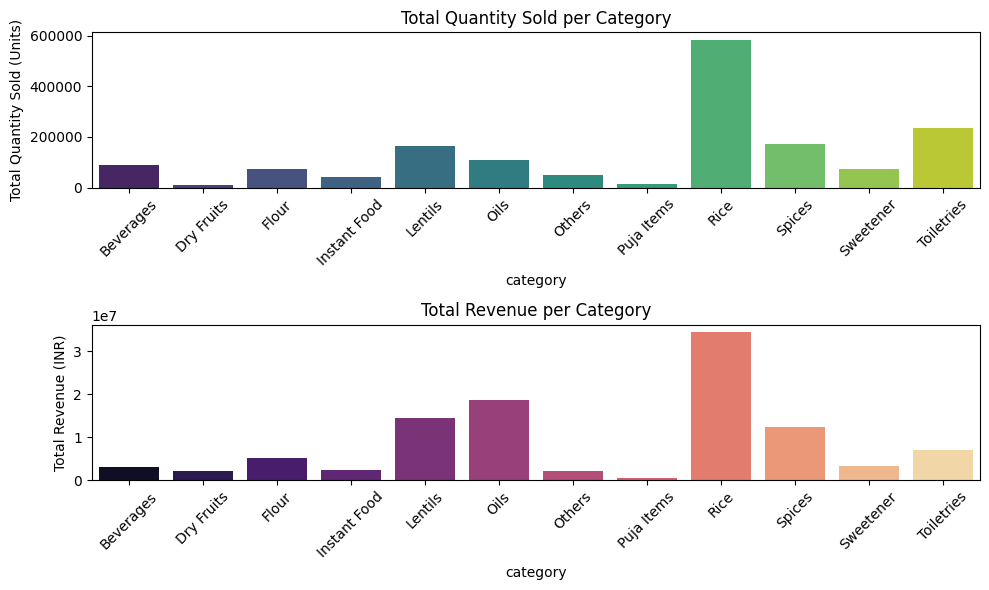

In [25]:
category_data = retail_store_data_cat.groupby('category').sum().reset_index()

# Extract quantity and amount columns
quantity_columns = [col for col in retail_store_data_cat.columns if 'quantity' in col]
amount_columns = [col for col in retail_store_data_cat.columns if 'amount' in col]

# Total Sales by Category (Quantity & Revenue)
plt.figure(figsize=(10, 6))
total_quantity = category_data[quantity_columns].sum(axis=1)
total_amount = category_data[amount_columns].sum(axis=1)

# Plot for Quantity Sold
plt.subplot(2, 1, 1)
sns.barplot(x=category_data['category'], y=total_quantity, palette="viridis")
plt.title('Total Quantity Sold per Category')
plt.ylabel('Total Quantity Sold (Units)')  # Label for quantity in units
plt.xticks(rotation=45)

# Plot for Revenue in INR
plt.subplot(2, 1, 2)
sns.barplot(x=category_data['category'], y=total_amount, palette="magma")
plt.title('Total Revenue per Category')
plt.ylabel('Total Revenue (INR)')  # Label the y-axis in INR
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
category_summary = pd.DataFrame({
    'Category': category_data['category'],
    'Total Quantity Sold (Units)': total_quantity,
    'Total Revenue (INR)': total_amount
})

# Display the DataFrame
print(category_summary)

        Category  Total Quantity Sold (Units)  Total Revenue (INR)
0      Beverages                    87485.200         3.035784e+06
1     Dry Fruits                     8417.038         2.182145e+06
2          Flour                    72918.248         5.104907e+06
3   Instant Food                    40404.540         2.316121e+06
4        Lentils                   162896.352         1.450487e+07
5           Oils                   110705.520         1.873605e+07
6         Others                    49831.350         2.130496e+06
7     Puja Items                    12731.680         4.034860e+05
8           Rice                   584452.140         3.440754e+07
9         Spices                   170826.158         1.230190e+07
10     Sweetener                    73012.612         3.264429e+06
11    Toiletries                   234028.780         6.998918e+06


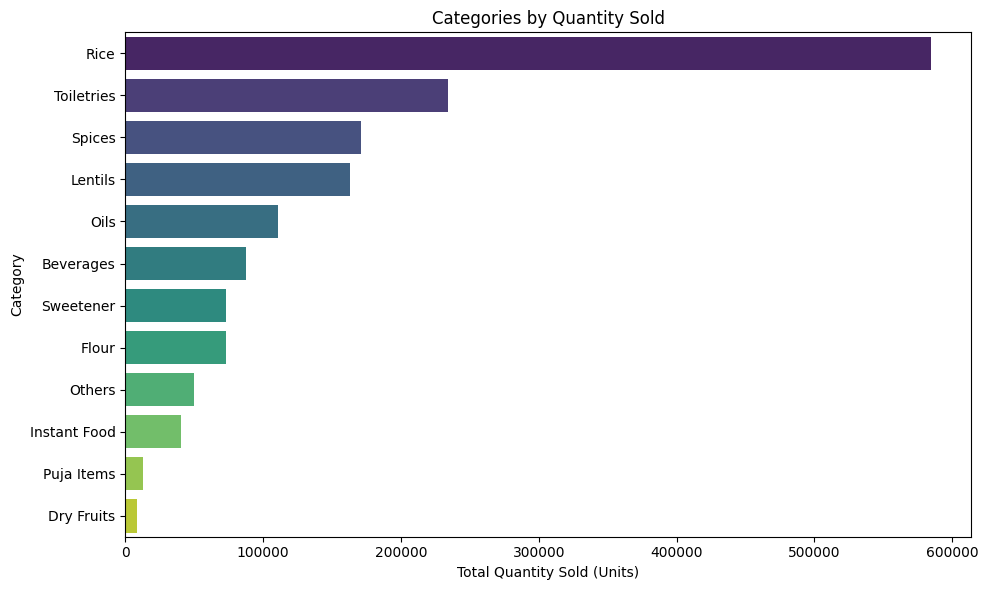

In [27]:
category_summary_sorted = category_summary.sort_values(by='Total Quantity Sold (Units)', ascending=False)

# Create the funnel plot (horizontal bar chart)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_summary_sorted['Total Quantity Sold (Units)'],
            y=category_summary_sorted['Category'],
            palette="viridis")

plt.title('Categories by Quantity Sold')
plt.xlabel('Total Quantity Sold (Units)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

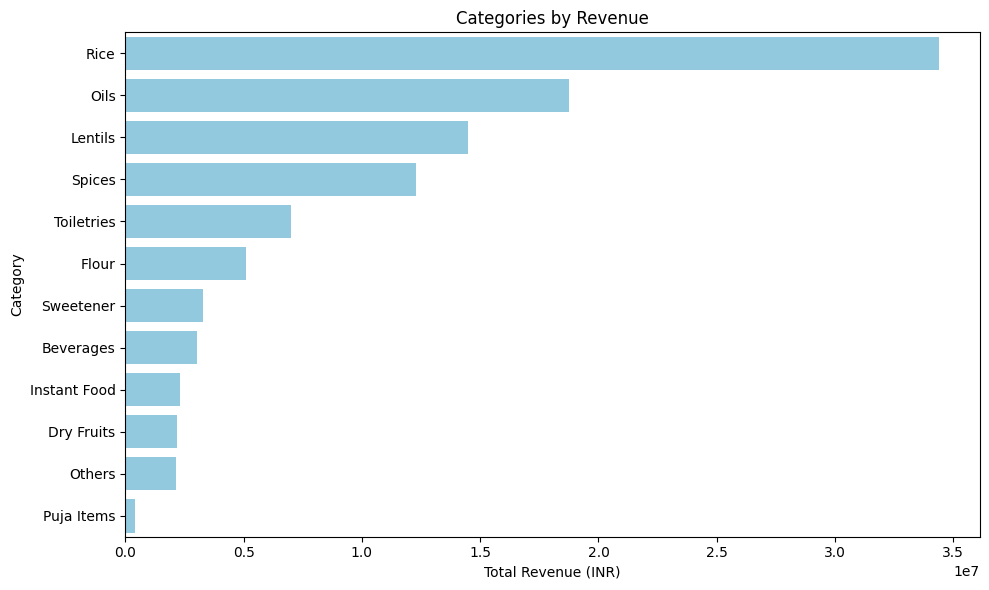

In [28]:
# Sort the category summary by total revenue (INR) in descending order
category_summary_sorted_by_revenue = category_summary.sort_values(by='Total Revenue (INR)', ascending=False)

# Create the funnel plot (horizontal bar chart) for revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=category_summary_sorted_by_revenue['Total Revenue (INR)'],
            y=category_summary_sorted_by_revenue['Category'],
            color="skyblue")

plt.title('Categories by Revenue')
plt.xlabel('Total Revenue (INR)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

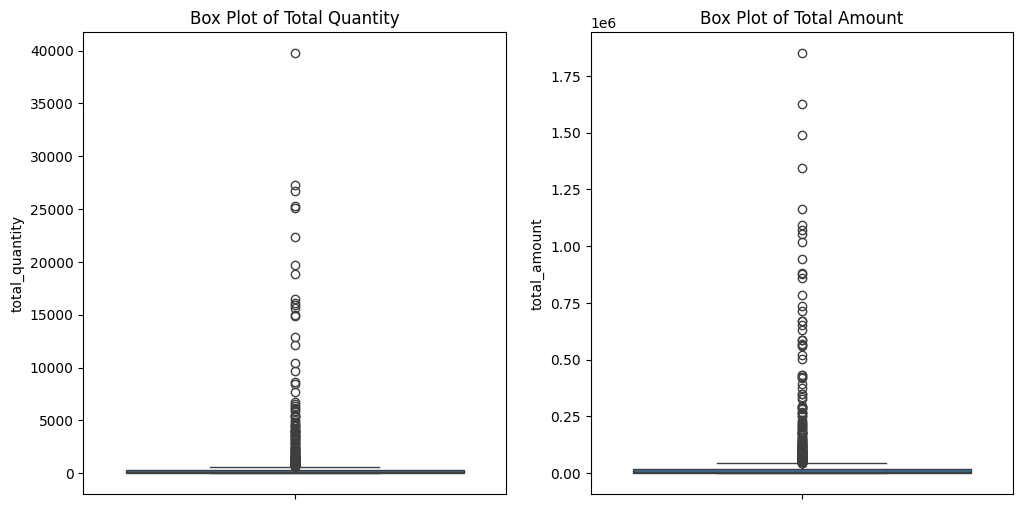

In [29]:
# Box plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(retail_store_data_cat['total_quantity'])
plt.title('Box Plot of Total Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(retail_store_data_cat['total_amount'])
plt.title('Box Plot of Total Amount')

plt.show()

#Rice Category Forecast


In [30]:
rice_data = retail_store_data_cat[retail_store_data_cat['category'] == 'Rice']

# Extract relevant columns for quantities and amounts
quantity_columns = [col for col in rice_data.columns if 'quantity' in col.lower()]
amount_columns = [col for col in rice_data.columns if 'amount' in col.lower()]

# Melt the DataFrame to long format for quantities
quantities_melted = rice_data.melt(id_vars=['product_name', 'category'],
                                   value_vars=quantity_columns,
                                   var_name='month',
                                   value_name='quantity')

# Melt the DataFrame to long format for amounts
amounts_melted = rice_data.melt(id_vars=['product_name', 'category'],
                                value_vars=amount_columns,
                                var_name='month',
                                value_name='amount')

# Remove '_quantity' and '_amount' suffix from the month column
quantities_melted['month'] = quantities_melted['month'].str.replace('_quantity', '')
amounts_melted['month'] = amounts_melted['month'].str.replace('_amount', '')

# Merge quantities and amounts dataframes on product_name, category, and month
monthly_sales = pd.merge(quantities_melted, amounts_melted, on=['product_name', 'category', 'month'])

# Filter out rows where both quantity and amount are zero to clean the data
monthly_sales = monthly_sales[(monthly_sales['quantity'] != 0) | (monthly_sales['amount'] != 0)]

# Group by month and sum the quantities and amounts
monthly_sales_summary = monthly_sales.groupby('month').sum().reset_index()

# Normalize the month names to a consistent format
def normalize_month(month):
    month_mapping = {
        'JAN': 'Jan', 'FEB': 'Feb', 'MAR': 'Mar', 'APRIL': 'Apr', 'MAY': 'May', 'JUNE': 'Jun',
        'JULY': 'Jul', 'AUG': 'Aug', 'SEP': 'Sep', 'OCT': 'Oct', 'NOV': 'Nov', 'DEC': 'Dec'
    }
    parts = month.split('_')
    if len(parts) > 1 and len(parts[1]) == 4:  # Check if year is already present in the correct format
        return month
    if parts[0].upper() in month_mapping:
        return f"{month_mapping[parts[0].upper()]}-{parts[1]}"
    return month

monthly_sales_summary['month'] = monthly_sales_summary['month'].apply(normalize_month)

monthly_rice_sales_summary = monthly_sales_summary[['month', 'quantity', 'amount']].rename(columns={'quantity': 'total_quantity', 'amount': 'total_amount'})
monthly_rice_sales_summary = monthly_rice_sales_summary[:-1]

print(monthly_rice_sales_summary)

     month  total_quantity  total_amount
0   Apr-18         4032.22   201134.9800
1   Apr-19         3467.60   207323.8285
2   Apr-20         4202.72   212562.1200
3   Apr-21         4063.22   199919.9400
4   Apr-22         4094.22   206823.5300
..     ...             ...           ...
73  Sep-19         2572.44   183719.9700
74  Sep-20         2376.00   124698.2800
75  Sep-21         2608.00   142597.8100
76  Sep-22         4640.73   257197.3517
77  Sep-23         2720.34   214844.8656

[78 rows x 3 columns]


In [31]:
monthly_rice_sales_summary['month']=pd.to_datetime(monthly_rice_sales_summary['month'], format='%b-%y')

In [32]:
monthly_rice_sales_summary = monthly_rice_sales_summary.sort_values(by='month')
monthly_rice_sales_summary

,month,total_quantity,total_amount
26,2018-01-01,3580.75,180767.500
19,2018-02-01,2775.85,147303.700
46,2018-03-01,2957.04,153031.460
0,2018-04-01,4032.22,201134.980
53,2018-05-01,4935.05,251761.921
...,...,...,...
25,2024-02-01,5409.05,359625.800
52,2024-03-01,4049.72,324918.420
6,2024-04-01,2753.70,191378.900
59,2024-05-01,1733.55,120356.982


In [33]:
monthly_rice_sales_summary.to_csv('riceDataMonthly.csv',index=False)

In [34]:
monthly_rice_sales_summary.describe()

,month,total_quantity,total_amount
count,78,78.000000,78.000000
mean,2021-03-16 23:04:36.923076864,3746.488077,220561.129672
min,2018-01-01 00:00:00,1724.300000,113211.500000
25%,2019-08-08 18:00:00,2995.125000,183902.627500
50%,2021-03-16 12:00:00,3580.750000,213376.018400
75%,2022-10-24 06:00:00,4335.920000,251644.970750
max,2024-06-01 00:00:00,6530.900000,359625.800000
std,NaN,1023.062352,58059.188362


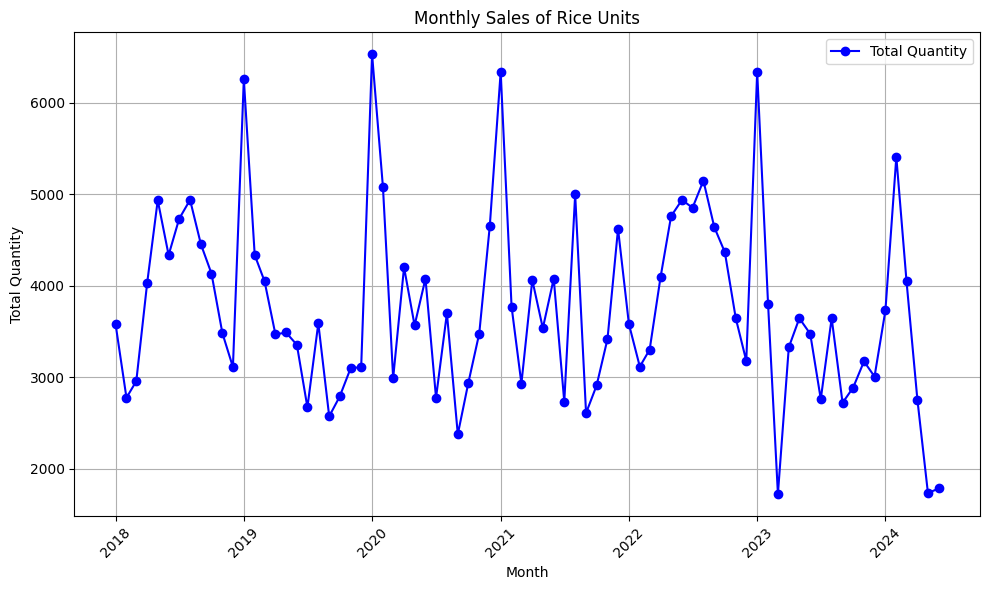

In [35]:
months = monthly_rice_sales_summary['month']
total_quantity = monthly_rice_sales_summary['total_quantity']
# total_amount = monthly_rice_sales_summary['total_amount']

# Plotting total quantity
plt.figure(figsize=(10, 6))
plt.plot(months, total_quantity, marker='o', color='b', label='Total Quantity')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Monthly Sales of Rice Units')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

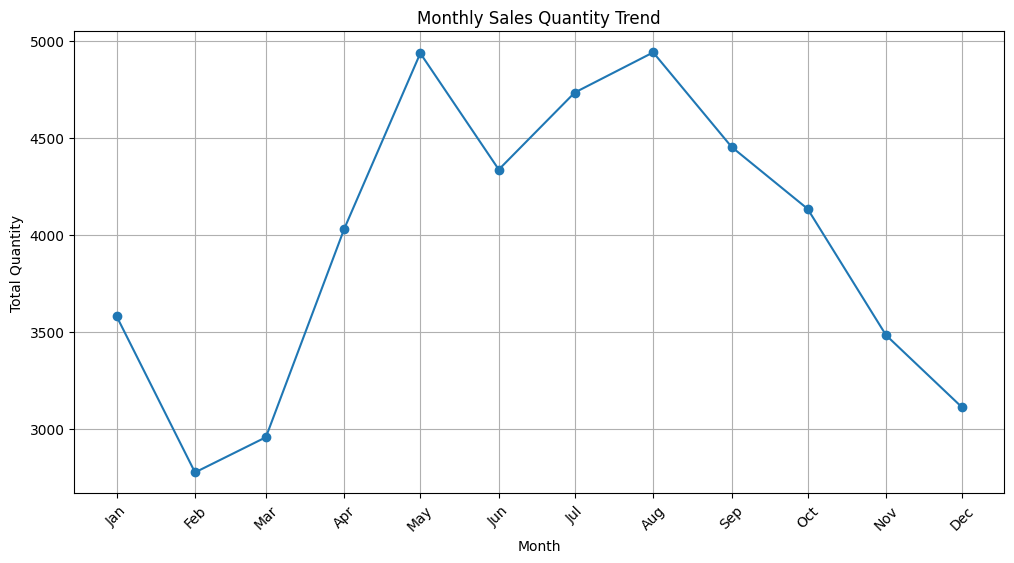

In [36]:
df_2020 = monthly_rice_sales_summary[monthly_rice_sales_summary['month'].dt.year == 2018]

plt.figure(figsize=(12, 6))
plt.plot(df_2020['month'], df_2020['total_quantity'], marker='o')

plt.title('Monthly Sales Quantity Trend')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.xticks(df_2020['month'], df_2020['month'].dt.strftime('%b'), rotation=45)
plt.show()

In [37]:
monthly_rice_sales_summary['year'] = monthly_rice_sales_summary['month'].dt.year
monthly_rice_sales_summary['quarter'] = monthly_rice_sales_summary['month'].dt.quarter
monthly_rice_sales_summary['month_num'] = monthly_rice_sales_summary['month'].dt.month

In [38]:
quarterly_data = monthly_rice_sales_summary.groupby(['year', 'quarter'])['total_quantity'].sum().reset_index()

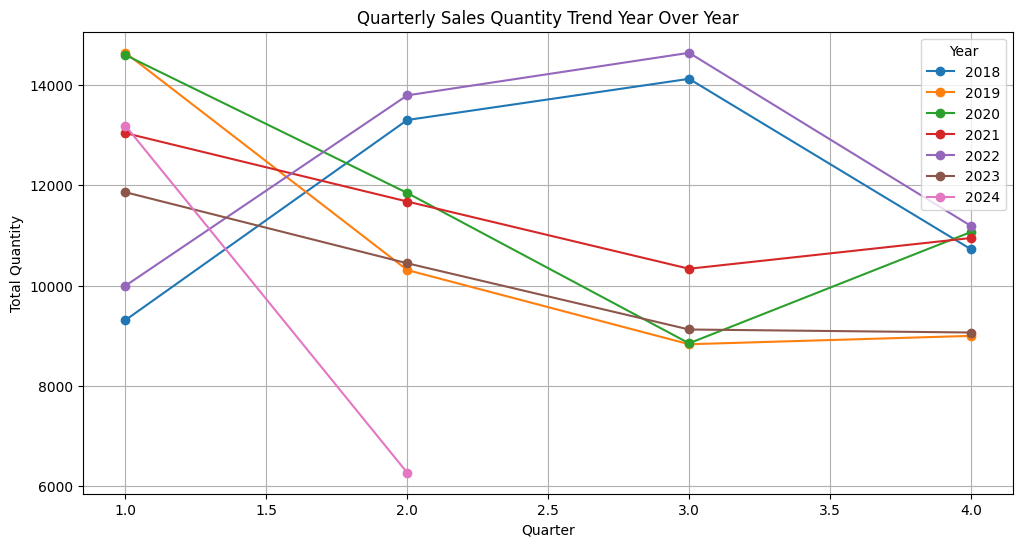

In [39]:
plt.figure(figsize=(12, 6))
for year in quarterly_data['year'].unique():
    plt.plot(quarterly_data[quarterly_data['year'] == year]['quarter'],
             quarterly_data[quarterly_data['year'] == year]['total_quantity'],
             marker='o', label=year)

plt.title('Quarterly Sales Quantity Trend Year Over Year')
plt.xlabel('Quarter')
plt.ylabel('Total Quantity')
plt.legend(title='Year')
plt.grid(True)
plt.show()

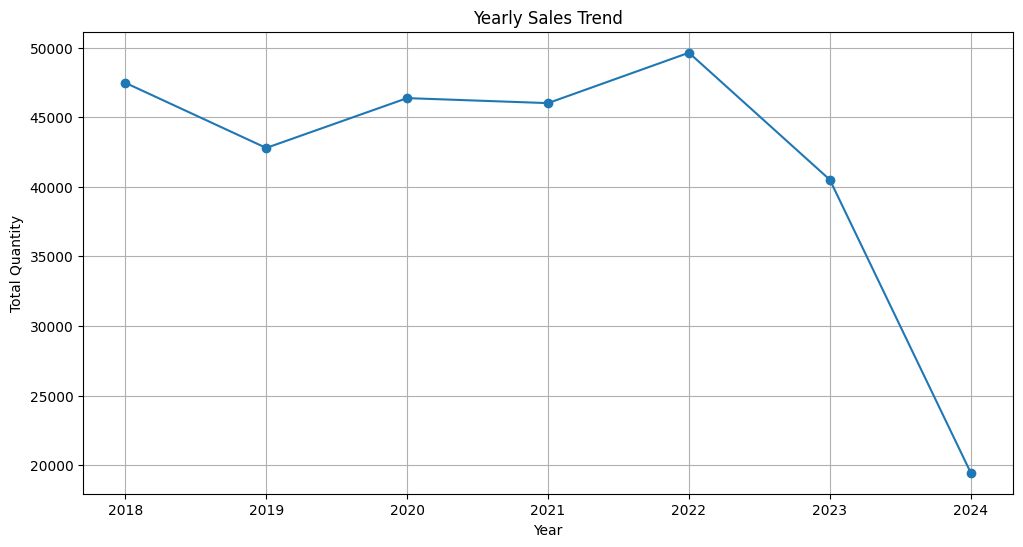

In [40]:
yearly_data = monthly_rice_sales_summary.groupby('year')['total_quantity'].sum().reset_index()

# Plot the yearly sales trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['year'], yearly_data['total_quantity'], marker='o')

plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.show()

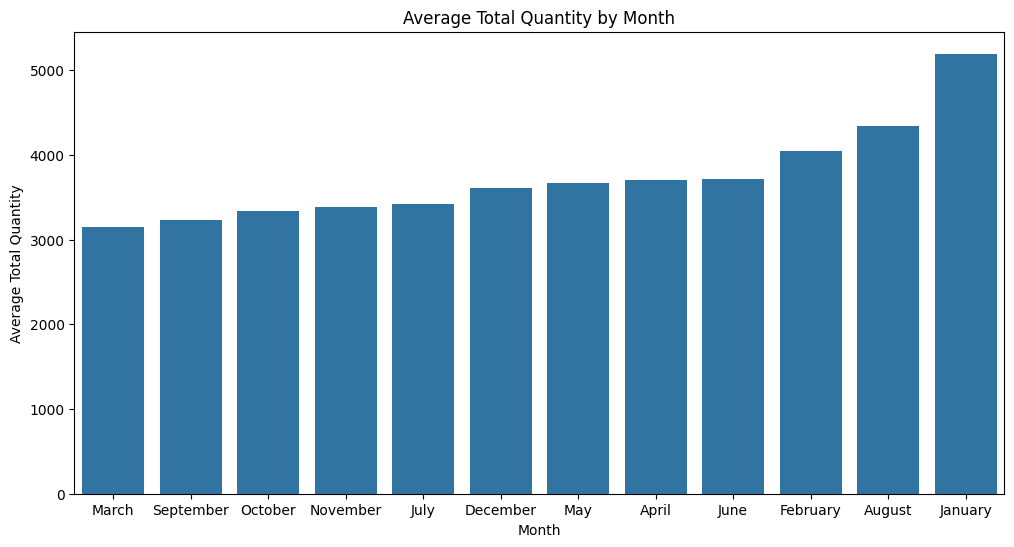

In [41]:
# Extract month and year
monthly_rice_sales_summary['month_name'] = monthly_rice_sales_summary['month'].dt.month_name()
monthly_rice_sales_summary['year'] = monthly_rice_sales_summary['month'].dt.year

# Group by month
month_grouped = monthly_rice_sales_summary.groupby('month_name').mean().sort_values(by='total_quantity')
# print(month_grouped)

# Plotting month-wise analysis
plt.figure(figsize=(12, 6))
sns.barplot(x=month_grouped.index, y='total_quantity', data=month_grouped)
plt.title('Average Total Quantity by Month')
plt.xlabel('Month')
plt.ylabel('Average Total Quantity')
plt.show()


Get 3 months moving average

In [42]:
mva_data = monthly_rice_sales_summary.copy()

In [43]:
mva_data['moving_average3'] = mva_data['total_quantity'].rolling(window=3).mean()

In [44]:
mva_data.dropna()

,month,total_quantity,total_amount,year,quarter,month_num,month_name,moving_average3
46,2018-03-01,2957.04,153031.460,2018,1,3,March,3104.546667
0,2018-04-01,4032.22,201134.980,2018,2,4,April,3255.036667
53,2018-05-01,4935.05,251761.921,2018,2,5,May,3974.770000
39,2018-06-01,4335.92,214873.920,2018,2,6,June,4434.396667
33,2018-07-01,4732.50,238481.200,2018,3,7,July,4667.823333
...,...,...,...,...,...,...,...,...
25,2024-02-01,5409.05,359625.800,2024,1,2,February,4049.143333
52,2024-03-01,4049.72,324918.420,2024,1,3,March,4396.590000
6,2024-04-01,2753.70,191378.900,2024,2,4,April,4070.823333
59,2024-05-01,1733.55,120356.982,2024,2,5,May,2845.656667


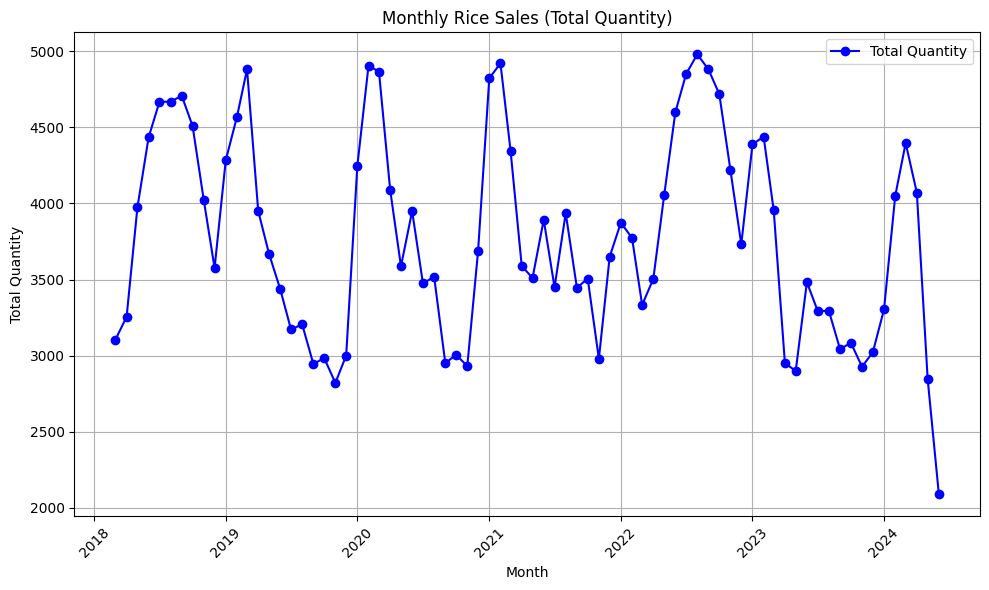

In [45]:
months = mva_data['month']
total_quantity = mva_data['moving_average3']

# Plotting total quantity
plt.figure(figsize=(10, 6))
plt.plot(months, total_quantity, marker='o', color='b', label='Total Quantity')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Monthly Rice Sales (Total Quantity)')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

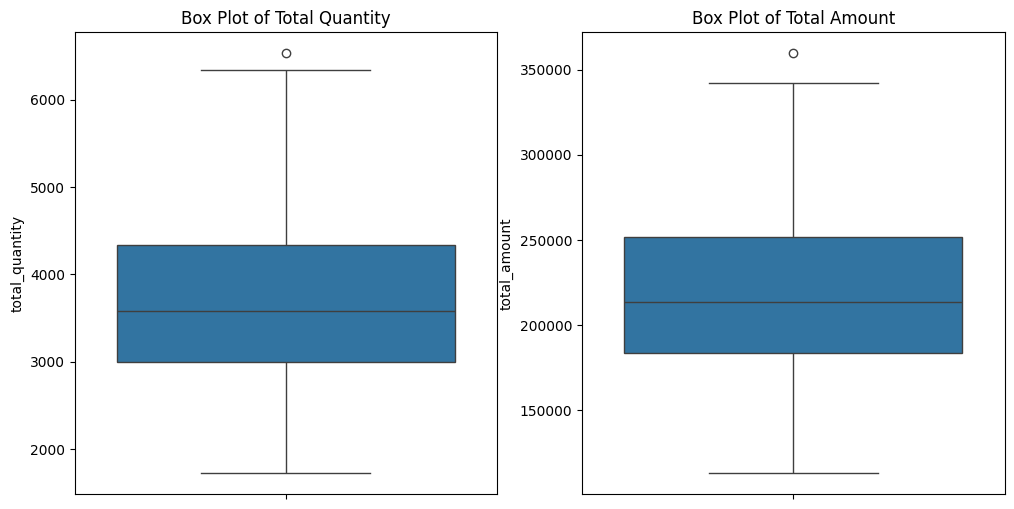

In [46]:
# Box plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(monthly_rice_sales_summary['total_quantity'])
plt.title('Box Plot of Total Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(monthly_rice_sales_summary['total_amount'])
plt.title('Box Plot of Total Amount')

plt.show()

In [47]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers
outliers_quantity = detect_outliers(monthly_rice_sales_summary, 'total_quantity')
outliers_amount = detect_outliers(monthly_rice_sales_summary, 'total_amount')

print("Outliers in Total Quantity:")
print(outliers_quantity)

print("\nOutliers in Total Amount:")
print(outliers_amount)

Outliers in Total Quantity:
        month  total_quantity  total_amount  year  quarter  month_num  \
28 2020-01-01          6530.9    335906.694  2020        1          1   

   month_name  
28    January  

Outliers in Total Amount:
        month  total_quantity  total_amount  year  quarter  month_num  \
25 2024-02-01         5409.05      359625.8  2024        1          2   

   month_name  
25   February  


In [48]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Cap outliers
df_capped_rice = monthly_rice_sales_summary.copy()
cap_outliers(df_capped_rice, 'total_quantity')
cap_outliers(df_capped_rice, 'total_amount')

print("Data after capping outliers:")
print(df_capped_rice)

Data after capping outliers:
        month  total_quantity   total_amount  year  quarter  month_num  \
26 2018-01-01         3580.75  180767.500000  2018        1          1   
19 2018-02-01         2775.85  147303.700000  2018        1          2   
46 2018-03-01         2957.04  153031.460000  2018        1          3   
0  2018-04-01         4032.22  201134.980000  2018        2          4   
53 2018-05-01         4935.05  251761.921000  2018        2          5   
..        ...             ...            ...   ...      ...        ...   
25 2024-02-01         5409.05  353258.485625  2024        1          2   
52 2024-03-01         4049.72  324918.420000  2024        1          3   
6  2024-04-01         2753.70  191378.900000  2024        2          4   
59 2024-05-01         1733.55  120356.982000  2024        2          5   
45 2024-06-01         1784.10  119445.890000  2024        2          6   

   month_name  
26    January  
19   February  
46      March  
0       April  
53

*italicized text*##Get moving average data


In [49]:
rice_data_lr = df_capped_rice.copy()

In [50]:
rice_data_lr['total_quantity'].mean()

3744.131826923076

In [51]:
for i in range(1, 3):
    rice_data_lr[f'lag{i}'] = rice_data_lr['total_quantity'].shift(i)

print(rice_data_lr)

        month  total_quantity   total_amount  year  quarter  month_num  \
26 2018-01-01         3580.75  180767.500000  2018        1          1   
19 2018-02-01         2775.85  147303.700000  2018        1          2   
46 2018-03-01         2957.04  153031.460000  2018        1          3   
0  2018-04-01         4032.22  201134.980000  2018        2          4   
53 2018-05-01         4935.05  251761.921000  2018        2          5   
..        ...             ...            ...   ...      ...        ...   
25 2024-02-01         5409.05  353258.485625  2024        1          2   
52 2024-03-01         4049.72  324918.420000  2024        1          3   
6  2024-04-01         2753.70  191378.900000  2024        2          4   
59 2024-05-01         1733.55  120356.982000  2024        2          5   
45 2024-06-01         1784.10  119445.890000  2024        2          6   

   month_name     lag1     lag2  
26    January      NaN      NaN  
19   February  3580.75      NaN  
46      M

In [52]:
rice_data_lr.dropna(inplace=True)

In [53]:
# Split data into features (X) and target variable (y)
X = rice_data_lr.drop(['month', 'total_quantity','month_name'], axis=1)
y = rice_data_lr['total_quantity']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(53, 6)
(23, 6)
(53,)
(23,)


##Linear Regression


In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = model.predict(X_test)

In [58]:
rice_mae_lr3 = mean_absolute_error(y_test, y_pred)
rice_mape_lr3 = mean_absolute_percentage_error(y_test, y_pred)
rice_rmse_lr3 = np.sqrt(mean_squared_error(y_test,y_pred))

r_squared = r2_score(y_test, y_pred)


print("Test Values:\n", y_test.values)
print("\n Predicted Values:\n", y_pred)
print("\n MAE:", rice_mae_lr3)
print("\n MAPE:", rice_mape_lr3*100)
print("\n R2:",r_squared)
print("\n RMSE:",rice_rmse_lr3)

Test Values:
 [5149.4  4640.73 4366.92 3646.57 3178.78 6338.9  3800.14 1724.3  3327.53
 3644.6  3474.58 2760.8  3645.57 2720.34 2886.05 3173.37 3007.38 3731.
 5409.05 4049.72 2753.7  1733.55 1784.1 ]

 Predicted Values:
 [4700.09529561 4385.37831683 3979.10957696 3700.29758595 3184.95642921
 5473.03907601 4502.89241093 2574.16642851 3476.81719806 4155.70463867
 4725.57209525 3995.61242636 5210.91213437 3823.32005938 3646.80559836
 4465.08580997 3653.43815452 4541.84581733 5821.29750254 5560.11055017
 3818.19512782 2728.99216525 2520.1014979 ]

 MAE: 765.7965810923965

 MAPE: 25.2813229047607

 R2: 0.37894978831744053

 RMSE: 881.3401415601852


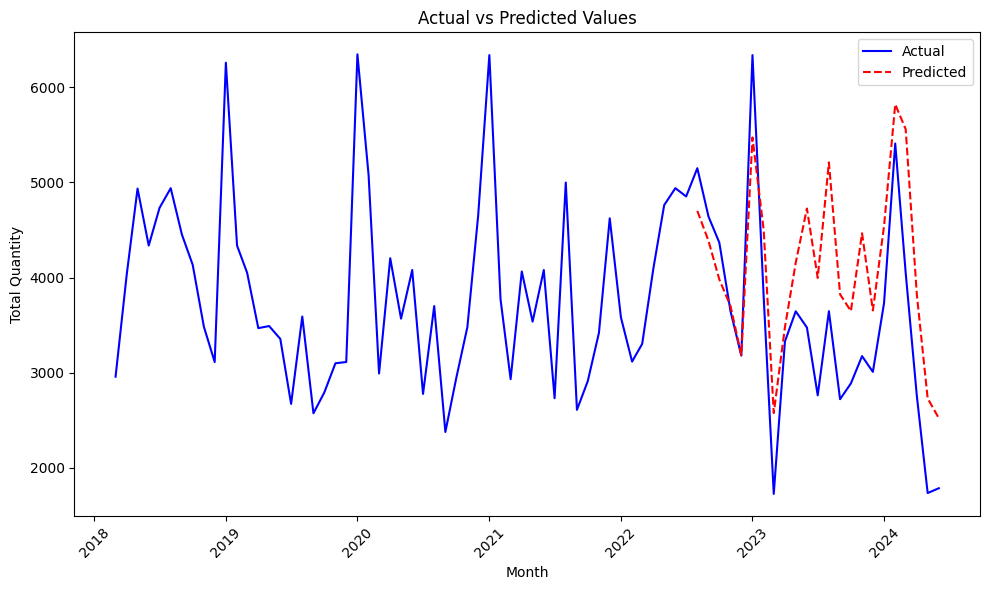

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(rice_data_lr['month'], y, label='Actual', color='blue')
plt.plot(rice_data_lr['month'][len(X_train):], y_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Actual vs Predicted Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

##AdaBoost Regressor

In [60]:
rice_data_ada = df_capped_rice.copy()

In [61]:
rice_data_ada['rolling_mean1'] = rice_data_ada['total_quantity'].rolling(window=2).mean()

In [62]:
for i in range(1, 7):
    rice_data_ada[f'moving_average_{i}'] = rice_data_ada['total_quantity'].shift(i)

print(rice_data_ada)

        month  total_quantity   total_amount  year  quarter  month_num  \
26 2018-01-01         3580.75  180767.500000  2018        1          1   
19 2018-02-01         2775.85  147303.700000  2018        1          2   
46 2018-03-01         2957.04  153031.460000  2018        1          3   
0  2018-04-01         4032.22  201134.980000  2018        2          4   
53 2018-05-01         4935.05  251761.921000  2018        2          5   
..        ...             ...            ...   ...      ...        ...   
25 2024-02-01         5409.05  353258.485625  2024        1          2   
52 2024-03-01         4049.72  324918.420000  2024        1          3   
6  2024-04-01         2753.70  191378.900000  2024        2          4   
59 2024-05-01         1733.55  120356.982000  2024        2          5   
45 2024-06-01         1784.10  119445.890000  2024        2          6   

   month_name  rolling_mean1  moving_average_1  moving_average_2  \
26    January            NaN               

In [63]:
rice_data_ada.dropna(inplace=True)

In [64]:
# Split data into features (X) and target variable (y)
X = rice_data_ada.drop(['month', 'total_quantity','month_name'], axis=1)
y = rice_data_ada['total_quantity']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [66]:
adaboost = AdaBoostRegressor()

In [67]:
adaboost.fit(X_train, y_train)

AdaBoostRegressor()

In [68]:
adaboost_pred = adaboost.predict(X_test)

In [69]:
rice_mae_ada3 = mean_absolute_error(y_test, adaboost_pred)
rice_mape_ada3 = mean_absolute_percentage_error(y_test, adaboost_pred)
rice_rmse_ada3 = np.sqrt(mean_squared_error(y_test,adaboost_pred))

r_squared_ada3 = r2_score(y_test, adaboost_pred)


# Display test and predicted values
print("Test Values:\n", y_test.values)
print("Predicted Values:\n", adaboost_pred,"\n")
print("MAE:", rice_mae_ada3)
print("MAPE:", rice_mape_ada3*100)
print("RMSE: ",rice_rmse_ada3)
print("R-square: ",r_squared_ada3)

Test Values:
 [4640.73 4366.92 3646.57 3178.78 6338.9  3800.14 1724.3  3327.53 3644.6
 3474.58 2760.8  3645.57 2720.34 2886.05 3173.37 3007.38 3731.   5409.05
 4049.72 2753.7  1733.55 1784.1 ]
Predicted Values:
 [4775.633125   4327.43833333 3737.30125    3121.592      6258.9
 4268.33555556 2904.92857143 3184.55166667 3633.85818182 4158.31166667
 3184.55166667 3538.61333333 3104.19375    3121.592      3451.24333333
 3184.55166667 3569.82181818 4928.65266667 4928.65266667 3033.68333333
 2991.75428571 2991.75428571] 

MAE: 398.18541621572894
MAPE: 16.13475567961082
RMSE:  555.5673143150227
R-square:  0.738720227115994


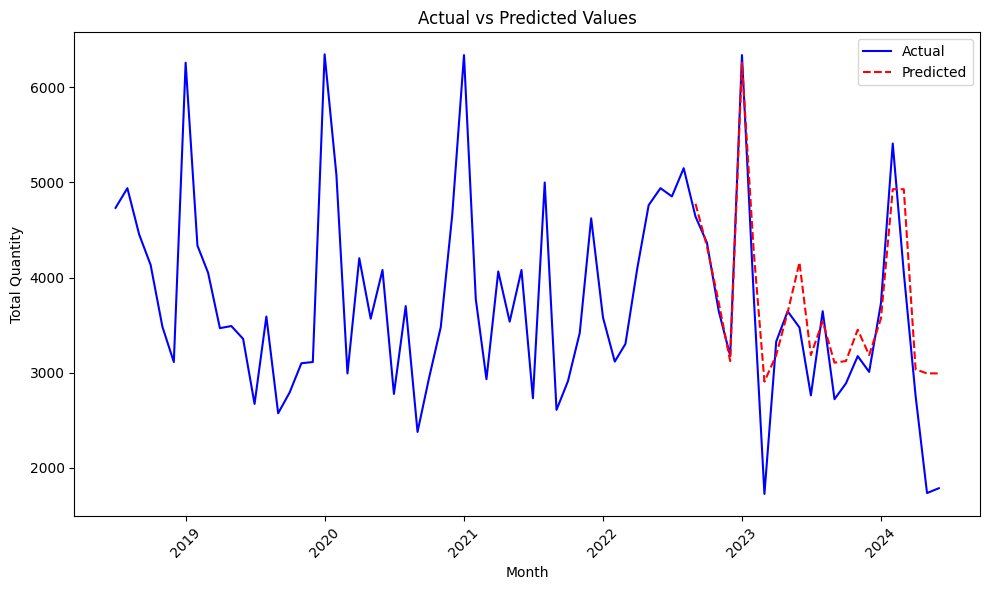

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(rice_data_ada['month'], y, label='Actual', color='blue')
plt.plot(rice_data_ada['month'][len(X_train):], adaboost_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Actual vs Predicted Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

##XG boost Regressor


In [71]:
rice_data_xgb = df_capped_rice.copy()

In [72]:
rice_data_xgb['rolling_mean1'] = rice_data_xgb['total_quantity'].rolling(window=2).mean()

In [73]:
for i in range(1, 2):
    rice_data_xgb[f'moving_average_{i}'] = rice_data_xgb['total_quantity'].shift(i)

print(rice_data_xgb)

        month  total_quantity   total_amount  year  quarter  month_num  \
26 2018-01-01         3580.75  180767.500000  2018        1          1   
19 2018-02-01         2775.85  147303.700000  2018        1          2   
46 2018-03-01         2957.04  153031.460000  2018        1          3   
0  2018-04-01         4032.22  201134.980000  2018        2          4   
53 2018-05-01         4935.05  251761.921000  2018        2          5   
..        ...             ...            ...   ...      ...        ...   
25 2024-02-01         5409.05  353258.485625  2024        1          2   
52 2024-03-01         4049.72  324918.420000  2024        1          3   
6  2024-04-01         2753.70  191378.900000  2024        2          4   
59 2024-05-01         1733.55  120356.982000  2024        2          5   
45 2024-06-01         1784.10  119445.890000  2024        2          6   

   month_name  rolling_mean1  moving_average_1  
26    January            NaN               NaN  
19   February

In [74]:
rice_data_xgb.dropna(inplace=True)

In [75]:
# Split data into features (X) and target variable (y)
X = rice_data_xgb.drop(['month', 'total_quantity','month_name'], axis=1)
y = rice_data_xgb['total_quantity']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [77]:
xgb = XGBRFRegressor()

In [78]:
xgb.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [79]:
xgb_pred = xgb.predict(X_test)

In [80]:
rice_mae_xgb3 = mean_absolute_error(y_test, xgb_pred)
rice_mape_xgb3 = mean_absolute_percentage_error(y_test, xgb_pred)
rice_rmse_xgb3 = np.sqrt(mean_squared_error(y_test,xgb_pred))

r_squared_xgb3 = r2_score(y_test, xgb_pred)


# Display test and predicted values
print("Test Values:\n", y_test.values)
print("Predicted Values:\n", xgb_pred,"\n")
print("MAE:", rice_mae_xgb3)
print("MAPE:", rice_mape_xgb3*100)
print("RSME:", rice_rmse_xgb3)
print("R square:", r_squared_xgb3)

Test Values:
 [4852.5  5149.4  4640.73 4366.92 3646.57 3178.78 6338.9  3800.14 1724.3
 3327.53 3644.6  3474.58 2760.8  3645.57 2720.34 2886.05 3173.37 3007.38
 3731.   5409.05 4049.72 2753.7  1733.55 1784.1 ]
Predicted Values:
 [4718.18   4949.725  4811.0215 4275.4272 3871.155  3025.8691 6179.2544
 4309.0645 2817.305  2930.2861 3949.0063 4097.0293 3112.9243 3675.4922
 2941.846  3104.3845 3482.848  3135.8494 3964.7441 5130.271  4947.2217
 2962.9512 2849.682  2843.1677] 

MAE: 379.71913330078127
MAPE: 14.546494944772473
RSME: 498.71036493493955
R square: 0.804096843880435


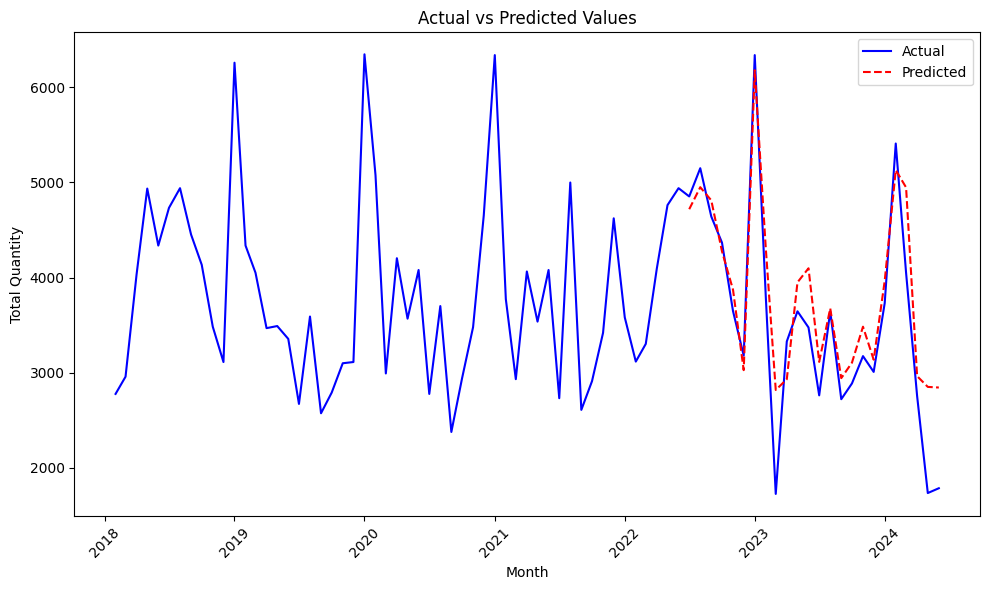

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(rice_data_xgb['month'], y, label='Actual', color='blue')
plt.plot(rice_data_xgb['month'][len(X_train):], xgb_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Actual vs Predicted Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

##Random Forest

In [82]:
rice_data_rf = df_capped_rice.copy()

In [83]:
rice_data_rf['rolling_mean1'] = rice_data_rf['total_quantity'].rolling(window=2).mean()

In [84]:
for i in range(1, 2):
    rice_data_rf[f'moving_average_{i}'] = rice_data_rf['total_quantity'].shift(i)

print(rice_data_rf)

        month  total_quantity   total_amount  year  quarter  month_num  \
26 2018-01-01         3580.75  180767.500000  2018        1          1   
19 2018-02-01         2775.85  147303.700000  2018        1          2   
46 2018-03-01         2957.04  153031.460000  2018        1          3   
0  2018-04-01         4032.22  201134.980000  2018        2          4   
53 2018-05-01         4935.05  251761.921000  2018        2          5   
..        ...             ...            ...   ...      ...        ...   
25 2024-02-01         5409.05  353258.485625  2024        1          2   
52 2024-03-01         4049.72  324918.420000  2024        1          3   
6  2024-04-01         2753.70  191378.900000  2024        2          4   
59 2024-05-01         1733.55  120356.982000  2024        2          5   
45 2024-06-01         1784.10  119445.890000  2024        2          6   

   month_name  rolling_mean1  moving_average_1  
26    January            NaN               NaN  
19   February

In [85]:
rice_data_rf.dropna(inplace=True)

In [86]:
# Split data into features (X) and target variable (y)
X = rice_data_rf.drop(['month', 'total_quantity','month_name'], axis=1)
y = rice_data_rf['total_quantity']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [88]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [89]:
y_pred_rf = rf_model.predict(X_test)

In [90]:
rice_mae_rf3 = mean_absolute_error(y_test, y_pred_rf)
rice_mape_rf3 = mean_absolute_percentage_error(y_test, y_pred_rf)

rice_rmse_rf3 = np.sqrt(mean_squared_error(y_test,y_pred_rf))

r_squared_rf3 = r2_score(y_test, y_pred_rf)

# Display test and predicted values
print("Test Values:\n", y_test.values)
print("Predicted Values:\n", y_pred_rf,"\n")
print("MAE:", rice_mae_rf3)
print("MAPE:", rice_mape_rf3*100)
print("RMSE:", rice_rmse_rf3)
print("R square:", r_squared_rf3)

Test Values:
 [4852.5  5149.4  4640.73 4366.92 3646.57 3178.78 6338.9  3800.14 1724.3
 3327.53 3644.6  3474.58 2760.8  3645.57 2720.34 2886.05 3173.37 3007.38
 3731.   5409.05 4049.72 2753.7  1733.55 1784.1 ]
Predicted Values:
 [4666.3879   4892.6801   4808.7799   4305.4578   3759.0675   3008.7228
 6157.059725 4265.7372   2761.883    3048.5227   3836.3028   4134.5486
 3254.4697   3713.93625  3106.5446   3211.8679   3499.138    3352.1433
 3996.20625  5323.224825 4988.652525 3049.6548   2880.5439   2867.1023  ] 

MAE: 397.12927812499953
MAPE: 15.278571500319435
RMSE: 512.9477479739137
R square: 0.7927517372552176


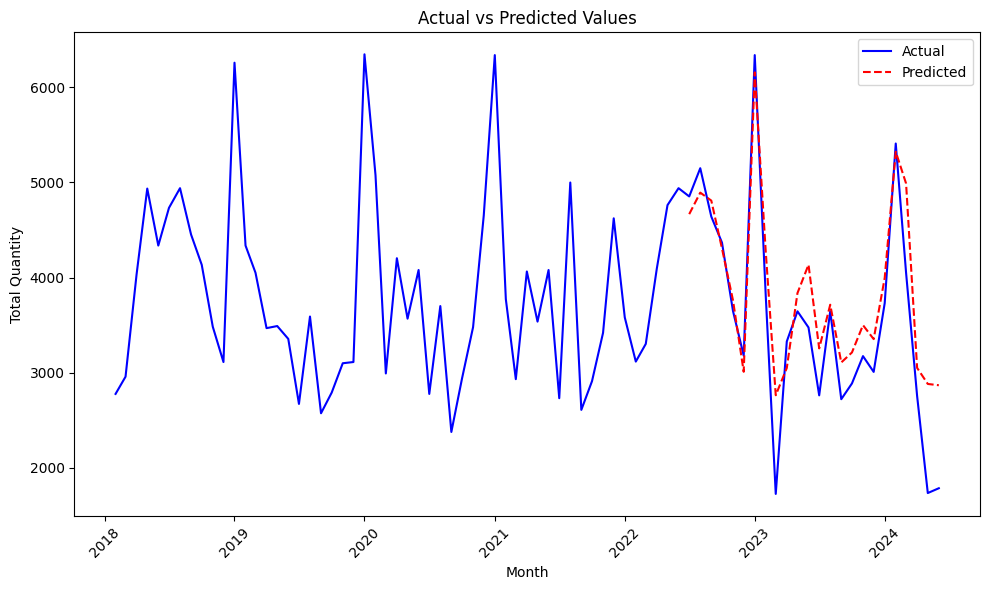

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(rice_data_rf['month'], y, label='Actual', color='blue')
plt.plot(rice_data_rf['month'][len(X_train):], y_pred_rf, label='Predicted', color='red', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Actual vs Predicted Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

##Metric Evaluation

In [92]:
data_rice = {
    'Metric': ['Rice-MAE', 'Rice-MAPE', 'Rice-RMSE', 'Rice-R-Square'],
    'Linear Regression': [rice_mae_lr3, rice_mape_lr3*100,rice_rmse_lr3,r_squared],
    'ADA Boost':[rice_mae_ada3,rice_mape_ada3*100,rice_rmse_ada3,r_squared_ada3],
    'XG Boost':[rice_mae_xgb3,rice_mape_xgb3*100,rice_rmse_xgb3,r_squared_xgb3],
    'Random Forest': [rice_mae_rf3, rice_mape_rf3*100,rice_rmse_rf3,r_squared_rf3],
    # 'Simple RNN': [rice_mae_rnn3, rice_mape_rnn3*100,rice_rmse_rnn3,r_squared_rnn3],
    # 'LSTM': [rice_mae_lstm3, rice_mape_lstm3*100,rice_rmse_lstm3,r_squared_lstm3]
}

# Create the DataFrame from the dictionary
df_rice = pd.DataFrame(data_rice)

# print(df_rice.to_string(columns=['Metric', 'Linear Regression', 'ADA Boost', 'XG Boost' ,'Random Forest', 'Simple RNN', 'LSTM'], header=True))
print(df_rice.to_string(columns=['Metric', 'Linear Regression', 'ADA Boost', 'XG Boost' ,'Random Forest'], header=True))

          Metric  Linear Regression   ADA Boost    XG Boost  Random Forest
0       Rice-MAE         765.796581  398.185416  379.719133     397.129278
1      Rice-MAPE          25.281323   16.134756   14.546495      15.278572
2      Rice-RMSE         881.340142  555.567314  498.710365     512.947748
3  Rice-R-Square           0.378950    0.738720    0.804097       0.792752


#Prediction

In [93]:
# Take the last known data point (X_test.iloc[-1]) and create a copy
future_predictions = []
last_known_data = X_test.iloc[-1:].copy()

# Drop 'moving_average_2' from last_known_data if the model was trained without it
if 'moving_average_2' in last_known_data.columns:
    last_known_data = last_known_data.drop(columns=['moving_average_2'])

# Start month-on-month predictions
for i in range(3):  # Predicting for the next 3 months
    # Predict the next value
    next_pred = xgb.predict(last_known_data)[0]

    # Append the prediction to the list
    future_predictions.append(next_pred)

    # Update lag features using the predicted value
    # Shift the lag features to prepare for the next prediction
    last_known_data[f'moving_average_1'] = next_pred
    last_known_data[f'moving_average_2'] = last_known_data[f'moving_average_1']

    # Drop 'moving_average_2' again if necessary in this loop (if not used during training)
    if 'moving_average_2' in last_known_data.columns:
        last_known_data = last_known_data.drop(columns=['moving_average_2'])

# Print month-on-month future predictions
print(f"Predicted demand for the next 3 months: {future_predictions}")


Predicted demand for the next 3 months: [2843.1677, 2846.1982, 2846.1982]


#Oil Category


In [94]:
oil_data = retail_store_data_cat[retail_store_data_cat['category'] == 'Oils']
# Extract relevant columns for quantities and amounts
quantity_columns = [col for col in oil_data.columns if 'quantity' in col.lower()]
amount_columns = [col for col in oil_data.columns if 'amount' in col.lower()]

# Melt the DataFrame to long format for quantities
quantities_melted = oil_data.melt(id_vars=['product_name', 'category'],
                                   value_vars=quantity_columns,
                                   var_name='month',
                                   value_name='quantity')

# Melt the DataFrame to long format for amounts
amounts_melted = oil_data.melt(id_vars=['product_name', 'category'],
                                value_vars=amount_columns,
                                var_name='month',
                                value_name='amount')

# Remove '_quantity' and '_amount' suffix from the month column
quantities_melted['month'] = quantities_melted['month'].str.replace('_quantity', '')
amounts_melted['month'] = amounts_melted['month'].str.replace('_amount', '')

# Merge quantities and amounts dataframes on product_name, category, and month
monthly_sales = pd.merge(quantities_melted, amounts_melted, on=['product_name', 'category', 'month'])

# Filter out rows where both quantity and amount are zero to clean the data
monthly_sales = monthly_sales[(monthly_sales['quantity'] != 0) | (monthly_sales['amount'] != 0)]

# Group by month and sum the quantities and amounts
monthly_sales_summary = monthly_sales.groupby('month').sum().reset_index()

# Normalize the month names to a consistent format
def normalize_month(month):
    month_mapping = {
        'JAN': 'Jan', 'FEB': 'Feb', 'MAR': 'Mar', 'APRIL': 'Apr', 'MAY': 'May', 'JUNE': 'Jun',
        'JULY': 'Jul', 'AUG': 'Aug', 'SEP': 'Sep', 'OCT': 'Oct', 'NOV': 'Nov', 'DEC': 'Dec'
    }
    parts = month.split('_')
    if len(parts) > 1 and len(parts[1]) == 4:  # Check if year is already present in the correct format
        return month
    if parts[0].upper() in month_mapping:
        return f"{month_mapping[parts[0].upper()]}-{parts[1]}"
    return month

monthly_sales_summary['month'] = monthly_sales_summary['month'].apply(normalize_month)

# Create the final DataFrame with only month, total quantity, and total amount
monthly_oil_sales_summary = monthly_sales_summary[['month', 'quantity', 'amount']].rename(columns={'quantity': 'total_quantity', 'amount': 'total_amount'})

monthly_oil_sales_summary = monthly_oil_sales_summary[:-1]
print(monthly_oil_sales_summary)

     month  total_quantity  total_amount
0   Apr-18           522.0      90863.00
1   Apr-19           591.5      92790.65
2   Apr-20           753.0     135885.67
3   Apr-21           564.0      98621.55
4   Apr-22           606.0     107508.45
..     ...             ...           ...
73  Sep-19           531.0      71439.00
74  Sep-20           586.0      96555.27
75  Sep-21           837.0     171127.12
76  Sep-22          1096.0     265563.78
77  Sep-23           709.5     111672.17

[78 rows x 3 columns]


In [95]:
monthly_oil_sales_summary['month']=pd.to_datetime(monthly_oil_sales_summary['month'], format='%b-%y')

In [96]:
monthly_oil_sales_summary = monthly_oil_sales_summary.sort_values(by='month')
monthly_oil_sales_summary

,month,total_quantity,total_amount
26,2018-01-01,532.00,84007.950
19,2018-02-01,770.00,120439.000
46,2018-03-01,794.50,147270.000
0,2018-04-01,522.00,90863.000
53,2018-05-01,898.50,188645.945
...,...,...,...
25,2024-02-01,614.00,100269.000
52,2024-03-01,517.00,70941.000
6,2024-04-01,451.00,58679.000
59,2024-05-01,731.50,134315.775


In [97]:
monthly_oil_sales_summary.to_csv('oilDataMonthly.csv',index=False)

In [98]:
mean_total_quantity_oil = monthly_oil_sales_summary['total_quantity'].mean()
mean_total_amount_oil = monthly_oil_sales_summary['total_amount'].mean()

monthly_oil_sales_summary.loc[monthly_oil_sales_summary['month'] == '2023-03-01', 'total_quantity'] = mean_total_quantity_oil
monthly_oil_sales_summary.loc[monthly_oil_sales_summary['month'] == '2023-03-01', 'total_amount'] = mean_total_amount_oil

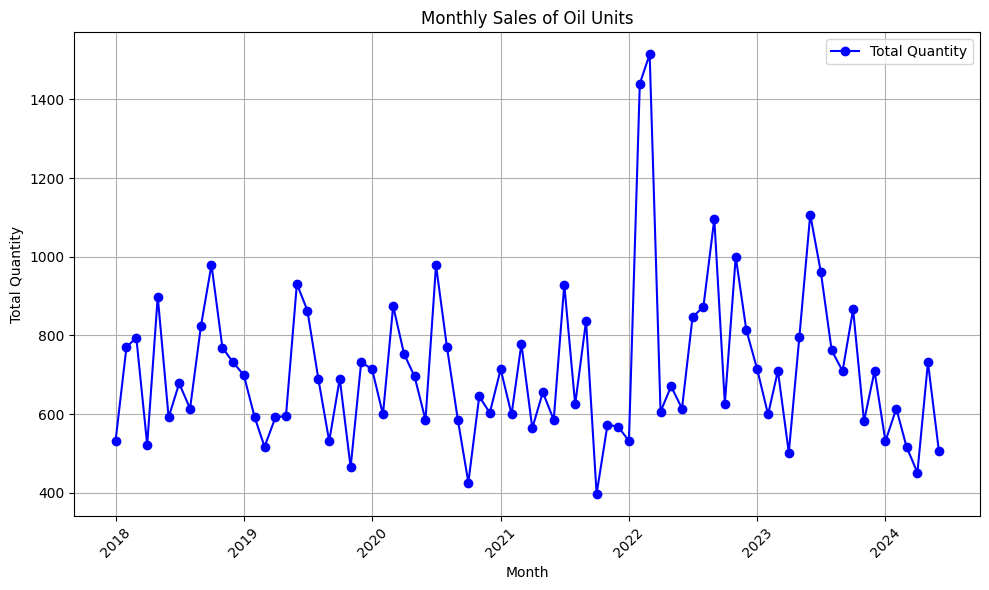

In [99]:
months = monthly_oil_sales_summary['month']
total_quantity = monthly_oil_sales_summary['total_quantity']
total_amount = monthly_oil_sales_summary['total_amount']

# Plotting total quantity
plt.figure(figsize=(10, 6))
plt.plot(months, total_quantity, marker='o', color='b', label='Total Quantity')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Monthly Sales of Oil Units')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# # Plotting total amount
# plt.figure(figsize=(10, 6))
# plt.plot(months, total_amount, marker='o', color='r', label='Total Amount')

# # Adding labels and title
# plt.xlabel('Month')
# plt.ylabel('Total Amount')
# plt.title('Monthly Oil and Ghee Sales (Total Amount)')
# plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
# plt.grid(True)
# plt.legend()

# # Display the plot
# plt.tight_layout()
# plt.show()

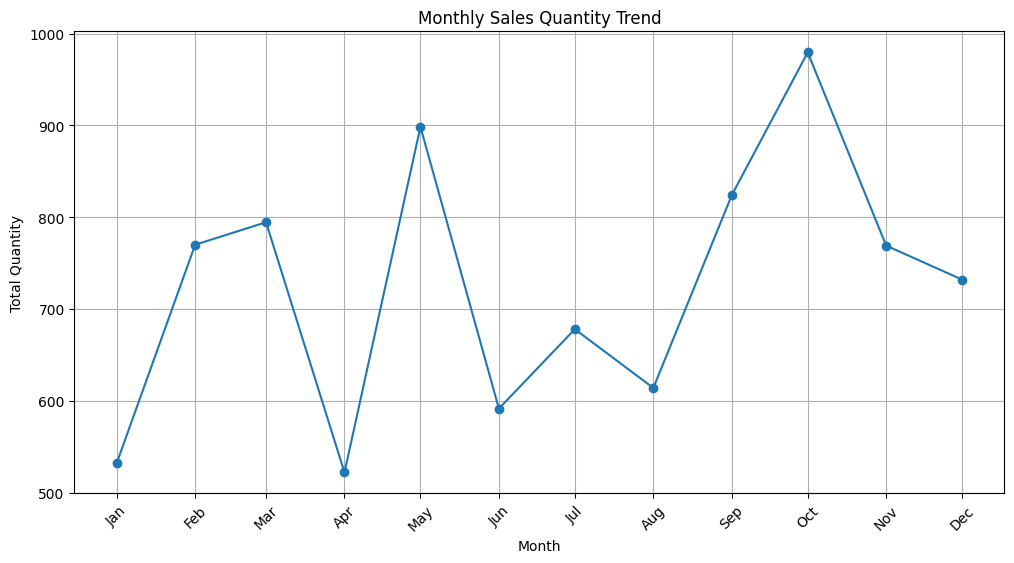

In [100]:
df_oil = monthly_oil_sales_summary[monthly_oil_sales_summary['month'].dt.year == 2018]

# Plot the monthly sales quantity trend for 2020
plt.figure(figsize=(12, 6))
plt.plot(df_oil['month'], df_oil['total_quantity'], marker='o')

plt.title('Monthly Sales Quantity Trend')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.xticks(df_oil['month'], df_oil['month'].dt.strftime('%b'), rotation=45)
plt.show()

In [101]:
monthly_oil_sales_summary['year'] = monthly_oil_sales_summary['month'].dt.year
monthly_oil_sales_summary['quarter'] = monthly_oil_sales_summary['month'].dt.quarter
monthly_oil_sales_summary['month_num'] = monthly_oil_sales_summary['month'].dt.month

In [102]:
quarterly_data = monthly_oil_sales_summary.groupby(['year', 'quarter'])['total_quantity'].sum().reset_index()

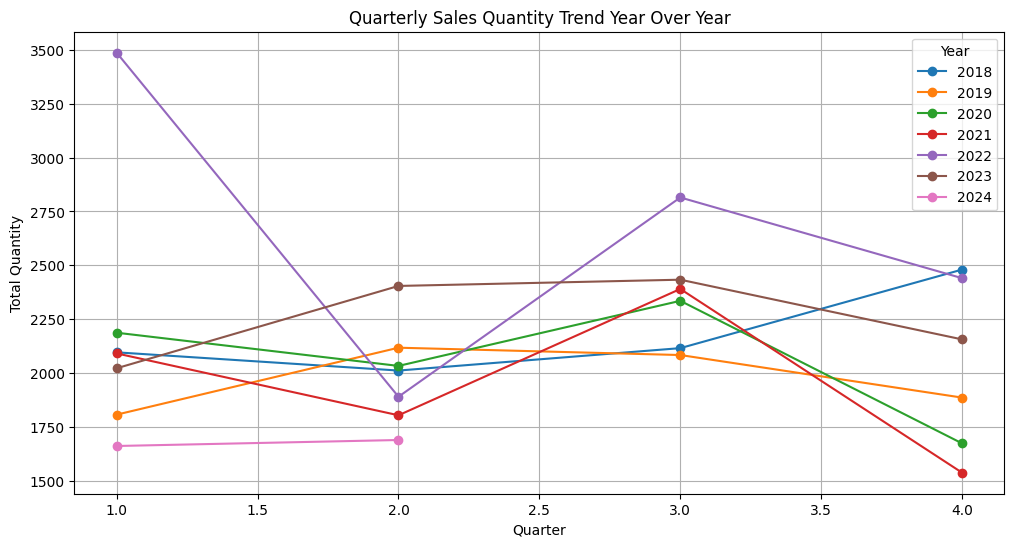

In [103]:
plt.figure(figsize=(12, 6))
for year in quarterly_data['year'].unique():
    plt.plot(quarterly_data[quarterly_data['year'] == year]['quarter'],
             quarterly_data[quarterly_data['year'] == year]['total_quantity'],
             marker='o', label=year)

plt.title('Quarterly Sales Quantity Trend Year Over Year')
plt.xlabel('Quarter')
plt.ylabel('Total Quantity')
plt.legend(title='Year')
plt.grid(True)
plt.show()

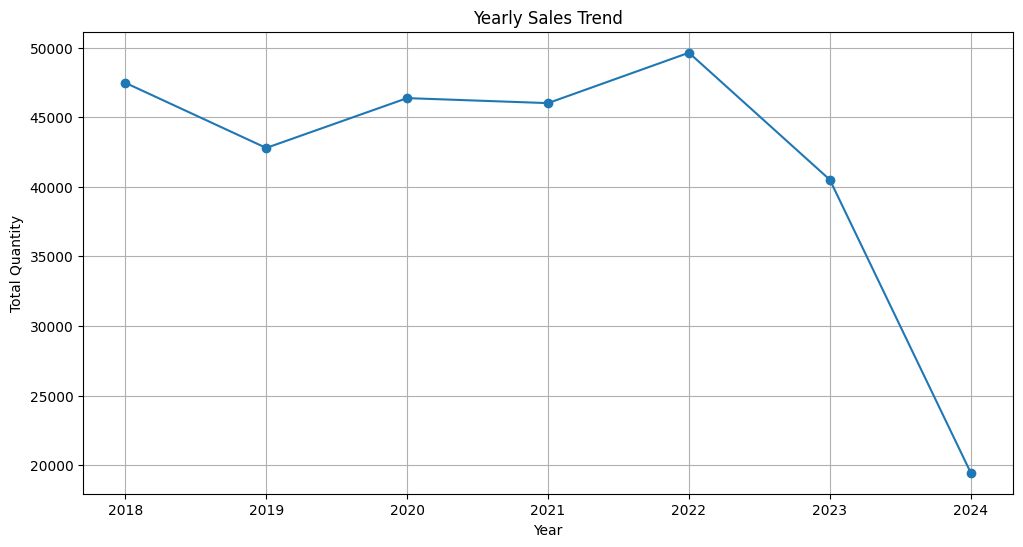

In [104]:
yearly_data = monthly_rice_sales_summary.groupby('year')['total_quantity'].sum().reset_index()

# Plot the yearly sales trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['year'], yearly_data['total_quantity'], marker='o')

plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.show()

In [105]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers
outliers_quantity = detect_outliers(monthly_oil_sales_summary, 'total_quantity')
outliers_amount = detect_outliers(monthly_oil_sales_summary, 'total_amount')

print("Outliers in Total Quantity:")
print(outliers_quantity)

print("\nOutliers in Total Amount:")
print(outliers_amount)

Outliers in Total Quantity:
        month  total_quantity  total_amount  year  quarter  month_num
23 2022-02-01          1440.0     302558.43  2022        1          2
50 2022-03-01          1514.5     315302.09  2022        1          3

Outliers in Total Amount:
        month  total_quantity  total_amount  year  quarter  month_num
23 2022-02-01          1440.0     302558.43  2022        1          2
50 2022-03-01          1514.5     315302.09  2022        1          3
76 2022-09-01          1096.0     265563.78  2022        3          9
64 2022-11-01          1000.0     229611.75  2022        4         11


In [106]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Cap outliers
df_capped_oil = monthly_oil_sales_summary.copy()
cap_outliers(df_capped_oil, 'total_quantity')
cap_outliers(df_capped_oil, 'total_amount')

print("Data after capping outliers:")
print(df_capped_oil)

Data after capping outliers:
        month  total_quantity  total_amount  year  quarter  month_num
26 2018-01-01          532.00     84007.950  2018        1          1
19 2018-02-01          770.00    120439.000  2018        1          2
46 2018-03-01          794.50    147270.000  2018        1          3
0  2018-04-01          522.00     90863.000  2018        2          4
53 2018-05-01          898.50    188645.945  2018        2          5
..        ...             ...           ...   ...      ...        ...
25 2024-02-01          614.00    100269.000  2024        1          2
52 2024-03-01          517.00     70941.000  2024        1          3
6  2024-04-01          451.00     58679.000  2024        2          4
59 2024-05-01          731.50    134315.775  2024        2          5
45 2024-06-01          507.26     74199.082  2024        2          6

[78 rows x 6 columns]


##Get 3 months moving average

In [107]:
oil_data3 = df_capped_oil.copy()

In [108]:
# Create new columns for moving averages of each month
for i in range(1, 4):
    oil_data3[f'moving_average_{i}'] = oil_data3['total_quantity'].shift(i)

print(oil_data3)

        month  total_quantity  total_amount  year  quarter  month_num  \
26 2018-01-01          532.00     84007.950  2018        1          1   
19 2018-02-01          770.00    120439.000  2018        1          2   
46 2018-03-01          794.50    147270.000  2018        1          3   
0  2018-04-01          522.00     90863.000  2018        2          4   
53 2018-05-01          898.50    188645.945  2018        2          5   
..        ...             ...           ...   ...      ...        ...   
25 2024-02-01          614.00    100269.000  2024        1          2   
52 2024-03-01          517.00     70941.000  2024        1          3   
6  2024-04-01          451.00     58679.000  2024        2          4   
59 2024-05-01          731.50    134315.775  2024        2          5   
45 2024-06-01          507.26     74199.082  2024        2          6   

    moving_average_1  moving_average_2  moving_average_3  
26               NaN               NaN               NaN  
19   

In [109]:
oil_data3.dropna(inplace=True)

In [110]:
oil_data3.shape

(75, 9)

##Linear Regression

In [111]:
X = oil_data3.drop(['month', 'total_quantity'], axis=1)
y = oil_data3['total_quantity']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [113]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [114]:
y_pred_lr = lr_model.predict(X_test)

In [115]:
oil_mae_lr = mean_absolute_error(y_test, y_pred_lr)
oil_mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
oil_rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
oil_r_squared_lr = r2_score(y_test, y_pred_lr)

# Display test and predicted values
print("Test Values:\n", y_test.values)
print("Predicted Values:\n", y_pred_lr,"\n")
print("MAE:", oil_mae_lr)
print("MAPE:", oil_mape_lr*100)
print("RMSE:", oil_rmse_lr)
print("R-sqaure:", oil_r_squared_lr)

Test Values:
 [ 814.          714.          599.          709.65076923  502.
  795.5        1107.          962.          762.          709.5
  866.          581.5         709.          531.          614.
  517.          451.          731.5         507.26      ]
Predicted Values:
 [722.03010784 649.48365979 513.52732211 647.73176113 456.67873524
 814.54569078 964.0027219  786.03020209 665.53021558 578.46994224
 739.31302602 559.70175764 733.47482863 429.75882944 587.76841111
 441.94935419 432.15521747 760.18342863 494.64811831] 

MAE: 71.07028079800776
MAPE: 9.861018887832923
RMSE: 85.56227902366072
R-sqaure: 0.7328051519287153


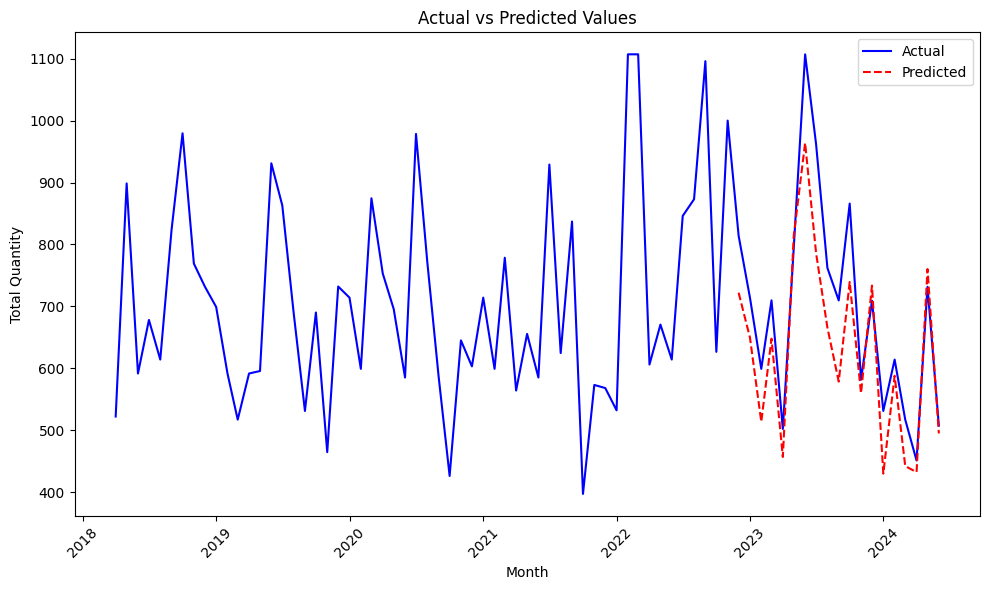

In [116]:
plt.figure(figsize=(10, 6))
plt.plot(oil_data3['month'], y, label='Actual', color='blue')
plt.plot(oil_data3['month'][len(X_train):], y_pred_lr, label='Predicted', color='red', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Actual vs Predicted Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

##AdaBoost Regressor

In [117]:
adaboost = AdaBoostRegressor()

In [118]:
adaboost.fit(X_train, y_train)

AdaBoostRegressor()

In [119]:
adaboost_pred = adaboost.predict(X_test)

In [120]:
oil_mae_ada3 = mean_absolute_error(y_test, adaboost_pred)
oil_mape_ada3 = mean_absolute_percentage_error(y_test, adaboost_pred)
oil_rmse_ada3 = np.sqrt(mean_squared_error(y_test,adaboost_pred))

oil_r_squared_ada3 = r2_score(y_test, adaboost_pred)


# Display test and predicted values
print("Test Values:\n", y_test.values)
print("Predicted Values:\n", adaboost_pred,"\n")
print("MAE:", oil_mae_ada3)
print("MAPE:", oil_mape_ada3*100)
print("RMSE: ",oil_rmse_ada3)
print("R-square: ",oil_r_squared_ada3)

Test Values:
 [ 814.          714.          599.          709.65076923  502.
  795.5        1107.          962.          762.          709.5
  866.          581.5         709.          531.          614.
  517.          451.          731.5         507.26      ]
Predicted Values:
 [835.1875     719.35       610.75       722.625      517.
 882.1875     913.08333333 844.53846154 789.         667.16666667
 881.94444444 594.9        913.08333333 489.4375     622.16666667
 522.         525.125      859.95       524.2       ] 

MAE: 54.8069849302744
MAPE: 7.402861752260491
RMSE:  82.27983574853364
R-square:  0.752912813397165


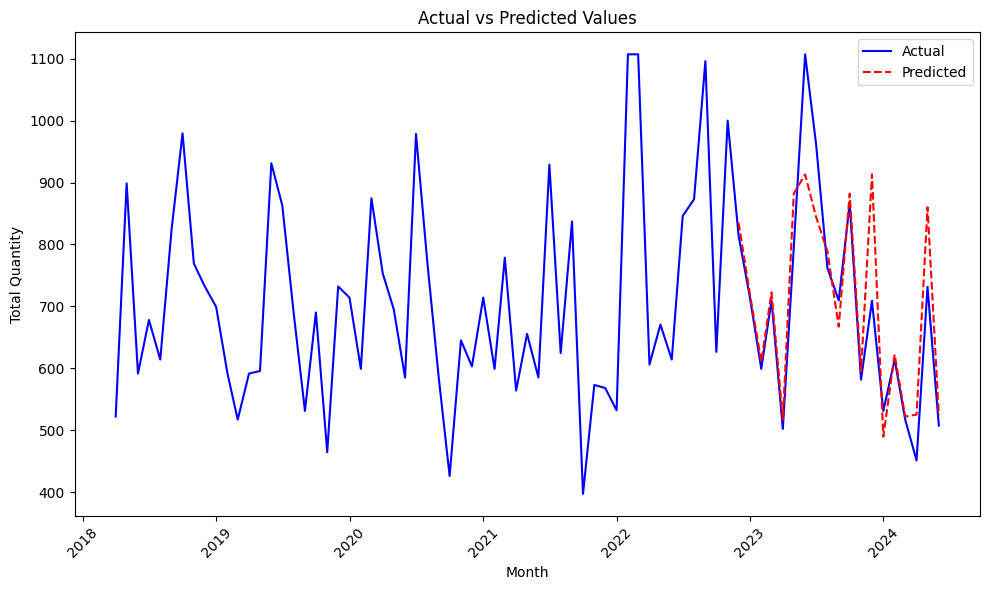

In [121]:
plt.figure(figsize=(10, 6))
plt.plot(oil_data3['month'], y, label='Actual', color='blue')
plt.plot(oil_data3['month'][len(X_train):], adaboost_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Actual vs Predicted Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

##XG boost Regressor


In [122]:
xgb = XGBRFRegressor()

In [123]:
xgb.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [124]:
xgb_pred = xgb.predict(X_test)

In [125]:
oil_mae_xgb3 = mean_absolute_error(y_test, xgb_pred)
oil_mape_xgb3 = mean_absolute_percentage_error(y_test, xgb_pred)
oil_rmse_xgb3 = np.sqrt(mean_squared_error(y_test,xgb_pred))

oil_r_squared_xgb3 = r2_score(y_test, xgb_pred)


# Display test and predicted values
print("Test Values:\n", y_test.values)
print("Predicted Values:\n", xgb_pred,"\n")
print("MAE:", oil_mae_xgb3)
print("MAPE:", oil_mape_xgb3*100)
print("RSME:", oil_rmse_xgb3)
print("R square:", oil_r_squared_xgb3)

Test Values:
 [ 814.          714.          599.          709.65076923  502.
  795.5        1107.          962.          762.          709.5
  866.          581.5         709.          531.          614.
  517.          451.          731.5         507.26      ]
Predicted Values:
 [790.1481  724.3492  607.4717  716.7861  513.1856  876.6866  916.1715
 837.6823  725.76324 662.7957  811.85504 607.733   820.9618  526.292
 609.4033  537.0011  539.46313 894.64923 539.42957] 

MAE: 55.036575982097666
MAPE: 7.423783236048465
RSME: 77.78403982664942
R square: 0.7791769609411041


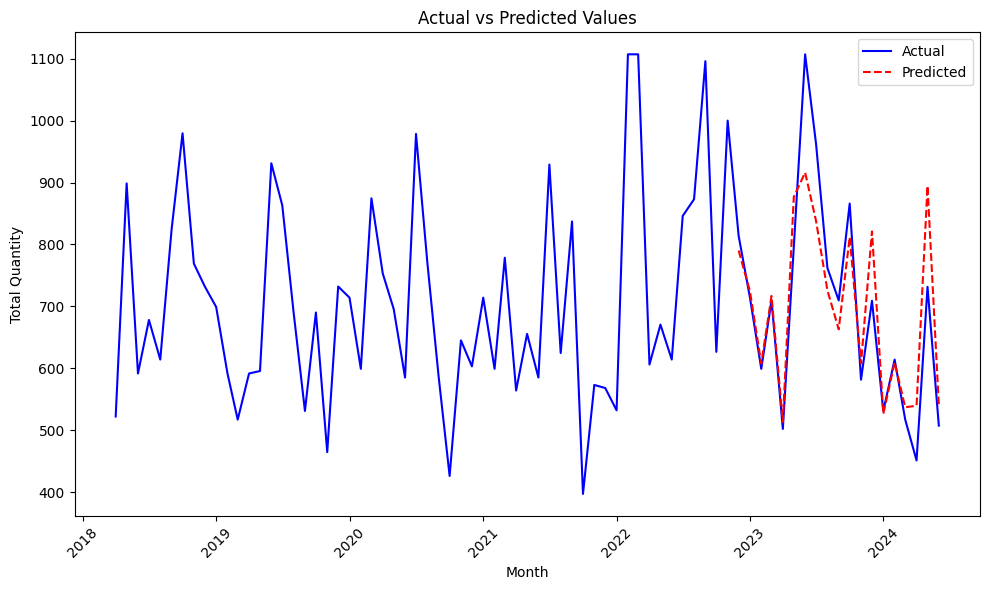

In [126]:
plt.figure(figsize=(10, 6))
plt.plot(oil_data3['month'], y, label='Actual', color='blue')
plt.plot(oil_data3['month'][len(X_train):], xgb_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Actual vs Predicted Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

##Random Forest

In [127]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [128]:
y_pred_rf = rf_model.predict(X_test)

In [129]:
oil_mae_rf = mean_absolute_error(y_test, y_pred_rf)
oil_mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
oil_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
oil_r_squared_rf = r2_score(y_test, y_pred_rf)

# Display test and predicted values
print("Test Values:\n", y_test.values)
print("Predicted Values:\n", y_pred_rf,"\n")
print("MAE:", oil_mae_rf)
print("MAPE:", oil_mape_rf*100)
print("RMSE:", oil_rmse_rf)
print("R-sqaure:", oil_r_squared_rf*100)

Test Values:
 [ 814.          714.          599.          709.65076923  502.
  795.5        1107.          962.          762.          709.5
  866.          581.5         709.          531.          614.
  517.          451.          731.5         507.26      ]
Predicted Values:
 [830.99625  701.195    590.505    708.815    498.61     876.986875
 900.660625 833.836875 723.265    665.025    809.905    584.365
 843.27     488.805    603.045    500.005    502.105    854.16875
 503.655   ] 

MAE: 51.70921811740892
MAPE: 6.704610171194912
RMSE: 76.3311161661564
R-sqaure: 78.73493971386254


##Metric Evaluations

In [130]:
data_oil = {
    'Metric': ['Oil-MAE', 'Oil-MAPE', 'Oil-RMSE', 'Oil-R-square'],
    'Linear Regression': [oil_mae_lr, oil_mape_lr*100,oil_rmse_lr,oil_r_squared_lr],
    'ADA Boost':[oil_mae_ada3,oil_mape_ada3*100,oil_rmse_ada3,oil_r_squared_ada3],
    'XG Boost':[oil_mae_xgb3,oil_mape_xgb3*100,oil_rmse_xgb3,oil_r_squared_xgb3],
    'Random Forest': [oil_mae_rf, oil_mape_rf*100,oil_rmse_rf,oil_r_squared_rf],
    # 'Simple RNN': [oil_mae_rnn, oil_mape_rnn*100,oil_rmse_rnn,oil_r_sqaure_rnn],
    # 'LSTM': [oil_mae_lstm, oil_mape_lstm*100,oil_rmse_lstm,oil_r_sqaure_lstm]
}

# Create the DataFrame from the dictionary
df_oil = pd.DataFrame(data_oil)

print(df_oil.to_string(columns=['Metric', 'Linear Regression', 'ADA Boost', 'XG Boost', 'Random Forest'], header=True))
# print(df_oil.to_string(columns=['Metric', 'Linear Regression', 'ADA Boost', 'XG Boost', 'Random Forest', 'Simple RNN', 'LSTM'], header=True))

         Metric  Linear Regression  ADA Boost   XG Boost  Random Forest
0       Oil-MAE          71.070281  54.806985  55.036576      51.709218
1      Oil-MAPE           9.861019   7.402862   7.423783       6.704610
2      Oil-RMSE          85.562279  82.279836  77.784040      76.331116
3  Oil-R-square           0.732805   0.752913   0.779177       0.787349


#Lentils Category


In [131]:
lentils_data = retail_store_data_cat[retail_store_data_cat['category'] == 'Lentils']

# Extract relevant columns for quantities and amounts
quantity_columns = [col for col in lentils_data.columns if 'quantity' in col.lower()]
amount_columns = [col for col in lentils_data.columns if 'amount' in col.lower()]

# Melt the DataFrame to long format for quantities
quantities_melted = lentils_data.melt(id_vars=['product_name', 'category'],
                                   value_vars=quantity_columns,
                                   var_name='month',
                                   value_name='quantity')

# Melt the DataFrame to long format for amounts
amounts_melted = lentils_data.melt(id_vars=['product_name', 'category'],
                                value_vars=amount_columns,
                                var_name='month',
                                value_name='amount')

# Remove '_quantity' and '_amount' suffix from the month column
quantities_melted['month'] = quantities_melted['month'].str.replace('_quantity', '')
amounts_melted['month'] = amounts_melted['month'].str.replace('_amount', '')

# Merge quantities and amounts dataframes on product_name, category, and month
monthly_sales = pd.merge(quantities_melted, amounts_melted, on=['product_name', 'category', 'month'])

# Filter out rows where both quantity and amount are zero to clean the data
monthly_sales = monthly_sales[(monthly_sales['quantity'] != 0) | (monthly_sales['amount'] != 0)]

# Group by month and sum the quantities and amounts
monthly_sales_summary = monthly_sales.groupby('month').sum().reset_index()

# Normalize the month names to a consistent format
def normalize_month(month):
    month_mapping = {
        'JAN': 'Jan', 'FEB': 'Feb', 'MAR': 'Mar', 'APRIL': 'Apr', 'MAY': 'May', 'JUNE': 'Jun',
        'JULY': 'Jul', 'AUG': 'Aug', 'SEP': 'Sep', 'OCT': 'Oct', 'NOV': 'Nov', 'DEC': 'Dec'
    }
    parts = month.split('_')
    if len(parts) > 1 and len(parts[1]) == 4:  # Check if year is already present in the correct format
        return month
    if parts[0].upper() in month_mapping:
        return f"{month_mapping[parts[0].upper()]}-{parts[1]}"
    return month

monthly_sales_summary['month'] = monthly_sales_summary['month'].apply(normalize_month)

# Create the final DataFrame with only month, total quantity, and total amount
monthly_lentils_sales_summary = monthly_sales_summary[['month', 'quantity', 'amount']].rename(columns={'quantity': 'total_quantity', 'amount': 'total_amount'})

monthly_lentils_sales_summary = monthly_lentils_sales_summary[:-1]
print(monthly_lentils_sales_summary)

     month  total_quantity  total_amount
0   Apr-18         915.590   73561.58000
1   Apr-19        1040.750   95910.02150
2   Apr-20        1141.090   92063.76000
3   Apr-21         956.590   76176.89000
4   Apr-22         986.090   79696.90000
..     ...             ...           ...
73  Sep-19         661.065   70639.54000
74  Sep-20         809.000   63086.68000
75  Sep-21        1061.000   83158.12000
76  Sep-22        1354.378  129247.03026
77  Sep-23         839.565   89689.17695

[78 rows x 3 columns]


In [132]:
monthly_lentils_sales_summary['month']=pd.to_datetime(monthly_lentils_sales_summary['month'], format='%b-%y')

In [133]:
monthly_lentils_sales_summary = monthly_lentils_sales_summary.sort_values(by='month')
monthly_lentils_sales_summary

,month,total_quantity,total_amount
26,2018-01-01,1155.215,88037.65000
19,2018-02-01,959.500,71576.10000
46,2018-03-01,931.910,76926.93000
0,2018-04-01,915.590,73561.58000
53,2018-05-01,1504.076,121937.83561
...,...,...,...
25,2024-02-01,900.713,100275.94000
52,2024-03-01,718.860,68871.85000
6,2024-04-01,955.450,102283.50000
59,2024-05-01,793.620,83012.10505


In [134]:
monthly_lentils_sales_summary.to_csv('lentilsDataarima.csv',index=False)

In [135]:
mean_total_quantity_lentils = monthly_lentils_sales_summary['total_quantity'].mean()
mean_total_amount_lentils = monthly_lentils_sales_summary['total_amount'].mean()

monthly_lentils_sales_summary.loc[monthly_lentils_sales_summary['month'] == '2023-03-01', 'total_quantity'] = mean_total_quantity_lentils
monthly_lentils_sales_summary.loc[monthly_lentils_sales_summary['month'] == '2023-03-01', 'total_amount'] = mean_total_amount_lentils

In [136]:
print(monthly_lentils_sales_summary.loc[monthly_lentils_sales_summary['month'] == '2023-03-01'])

        month  total_quantity  total_amount
51 2023-03-01     1044.207385  92979.941191


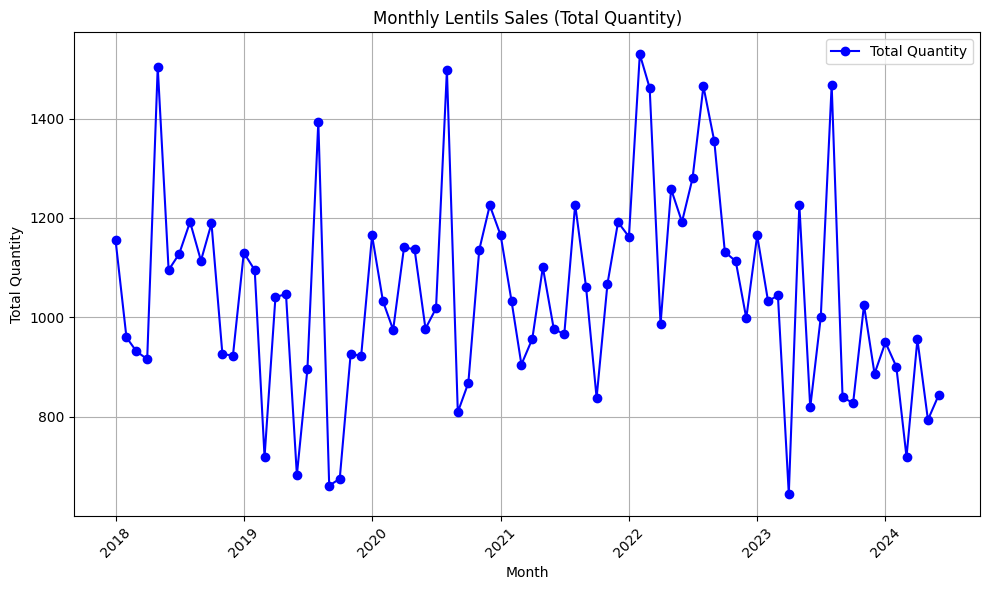

In [137]:
months = monthly_lentils_sales_summary['month']
total_quantity = monthly_lentils_sales_summary['total_quantity']
total_amount = monthly_lentils_sales_summary['total_amount']

# Plotting total quantity
plt.figure(figsize=(10, 6))
plt.plot(months, total_quantity, marker='o', color='b', label='Total Quantity')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Monthly Lentils Sales (Total Quantity)')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# # Plotting total amount
# plt.figure(figsize=(10, 6))
# plt.plot(months, total_amount, marker='o', color='r', label='Total Amount')

# # Adding labels and title
# plt.xlabel('Month')
# plt.ylabel('Total Amount')
# plt.title('Monthly Lentils Sales (Total Amount)')
# plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
# plt.grid(True)
# plt.legend()

# # Display the plot
# plt.tight_layout()
# plt.show()

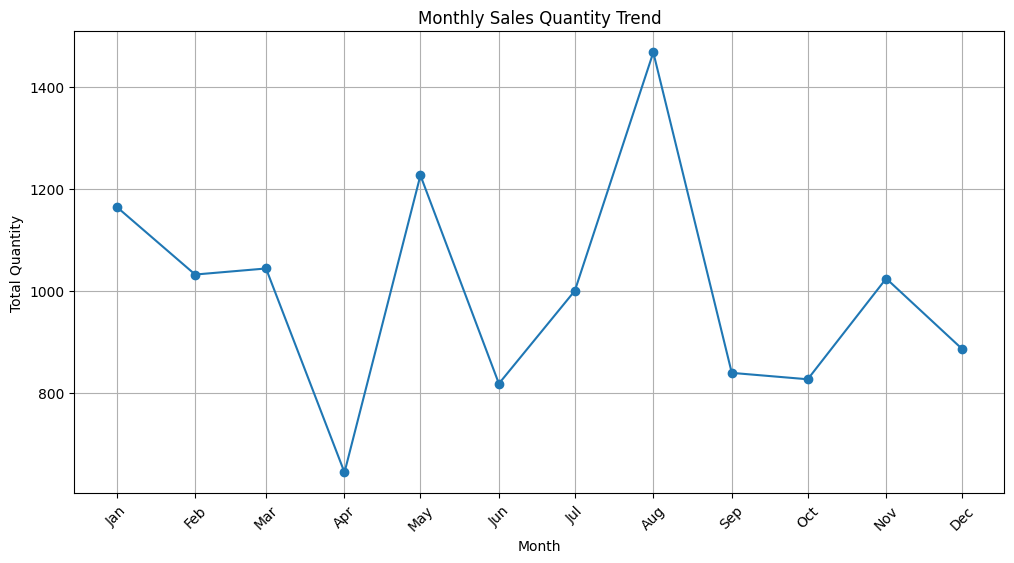

In [138]:
df_lentils = monthly_lentils_sales_summary[monthly_lentils_sales_summary['month'].dt.year == 2023]

# Plot the monthly sales quantity trend for 2020
plt.figure(figsize=(12, 6))
plt.plot(df_lentils['month'], df_lentils['total_quantity'], marker='o')

plt.title('Monthly Sales Quantity Trend')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.xticks(df_lentils['month'], df_lentils['month'].dt.strftime('%b'), rotation=45)
plt.show()

In [139]:
monthly_lentils_sales_summary['year'] = monthly_lentils_sales_summary['month'].dt.year
monthly_lentils_sales_summary['quarter'] = monthly_lentils_sales_summary['month'].dt.quarter

In [140]:
quarterly_data = monthly_lentils_sales_summary.groupby(['year', 'quarter'])['total_quantity'].sum().reset_index()

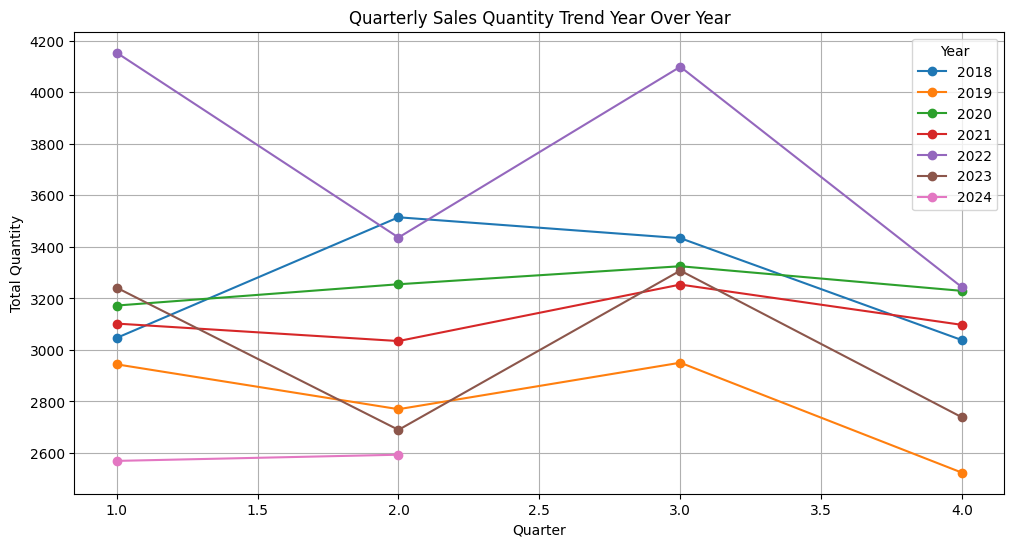

In [141]:
plt.figure(figsize=(12, 6))
for year in quarterly_data['year'].unique():
    plt.plot(quarterly_data[quarterly_data['year'] == year]['quarter'],
             quarterly_data[quarterly_data['year'] == year]['total_quantity'],
             marker='o', label=year)

plt.title('Quarterly Sales Quantity Trend Year Over Year')
plt.xlabel('Quarter')
plt.ylabel('Total Quantity')
plt.legend(title='Year')
plt.grid(True)
plt.show()

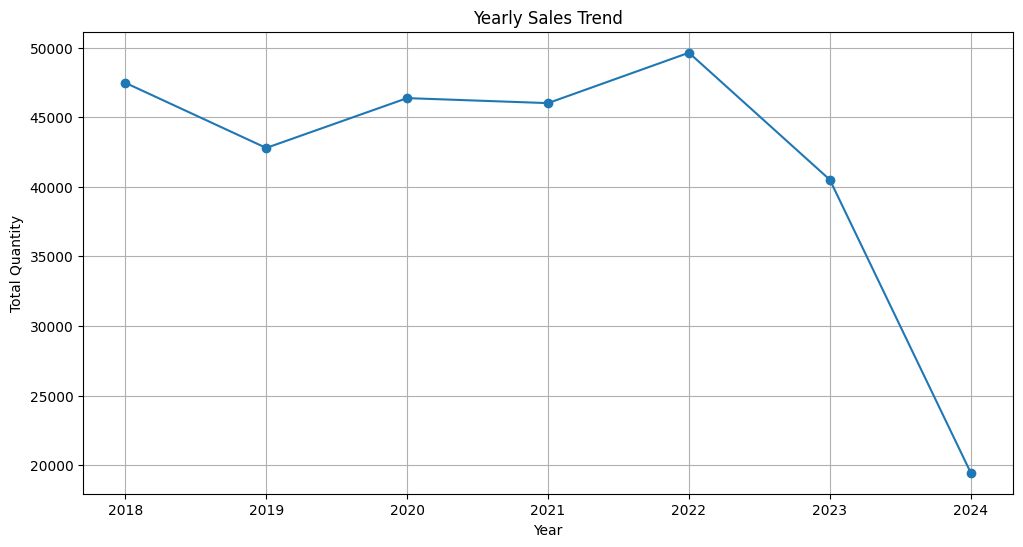

In [142]:
yearly_data = monthly_rice_sales_summary.groupby('year')['total_quantity'].sum().reset_index()

# Plot the yearly sales trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['year'], yearly_data['total_quantity'], marker='o')

plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.show()

In [143]:
monthly_lentils_sales_summary.to_csv('monthly_lentils_sales_summary.csv', index=False)

In [144]:
lentil_data=monthly_lentils_sales_summary.drop(columns=['total_amount'],axis=1)
lentil_data

,month,total_quantity,year,quarter
26,2018-01-01,1155.215,2018,1
19,2018-02-01,959.500,2018,1
46,2018-03-01,931.910,2018,1
0,2018-04-01,915.590,2018,2
53,2018-05-01,1504.076,2018,2
...,...,...,...,...
25,2024-02-01,900.713,2024,1
52,2024-03-01,718.860,2024,1
6,2024-04-01,955.450,2024,2
59,2024-05-01,793.620,2024,2


In [145]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers
outliers_quantity = detect_outliers(monthly_lentils_sales_summary, 'total_quantity')
outliers_amount = detect_outliers(monthly_lentils_sales_summary, 'total_amount')

print("Outliers in Total Quantity:")
print(outliers_quantity)

print("\nOutliers in Total Amount:")
print(outliers_amount)

Outliers in Total Quantity:
        month  total_quantity  total_amount  year  quarter
23 2022-02-01          1529.5     116423.14  2022        1

Outliers in Total Amount:
        month  total_quantity  total_amount  year  quarter
8  2019-08-01        1393.782  148171.56000  2019        3
9  2020-08-01        1497.782  158357.43000  2020        3
11 2022-08-01        1465.105  140832.13105  2022        3
12 2023-08-01        1467.782  155749.13130  2023        3


In [146]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Cap outliers
df_capped_lentils = monthly_lentils_sales_summary.copy()
cap_outliers(df_capped_lentils, 'total_quantity')
cap_outliers(df_capped_lentils, 'total_amount')

print("Data after capping outliers:")
print(df_capped_lentils)

Data after capping outliers:
        month  total_quantity  total_amount  year  quarter
26 2018-01-01        1155.215   88037.65000  2018        1
19 2018-02-01         959.500   71576.10000  2018        1
46 2018-03-01         931.910   76926.93000  2018        1
0  2018-04-01         915.590   73561.58000  2018        2
53 2018-05-01        1504.076  121937.83561  2018        2
..        ...             ...           ...   ...      ...
25 2024-02-01         900.713  100275.94000  2024        1
52 2024-03-01         718.860   68871.85000  2024        1
6  2024-04-01         955.450  102283.50000  2024        2
59 2024-05-01         793.620   83012.10505  2024        2
45 2024-06-01         844.157   98884.19554  2024        2

[78 rows x 5 columns]


In [147]:
df_capped_lentils.to_csv('cappedlentils.csv',index=False)

##Get 6 months moving average

In [148]:
lentil_data3 =df_capped_lentils.copy()

In [149]:
lentil_data3

,month,total_quantity,total_amount,year,quarter
26,2018-01-01,1155.215,88037.65000,2018,1
19,2018-02-01,959.500,71576.10000,2018,1
46,2018-03-01,931.910,76926.93000,2018,1
0,2018-04-01,915.590,73561.58000,2018,2
53,2018-05-01,1504.076,121937.83561,2018,2
...,...,...,...,...,...
25,2024-02-01,900.713,100275.94000,2024,1
52,2024-03-01,718.860,68871.85000,2024,1
6,2024-04-01,955.450,102283.50000,2024,2
59,2024-05-01,793.620,83012.10505,2024,2


##Linear Regression

In [150]:
# Split data into features (X) and target variable (y)
X = lentil_data3.drop(['month', 'total_quantity'], axis=1)
y = lentil_data3['total_quantity']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [152]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [153]:
y_pred_lr = lr_model.predict(X_test)

In [154]:
lentils_mae_lr = mean_absolute_error(y_test, y_pred_lr)
lentils_mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
lentils_rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lentils_r_sqaure_lr = r2_score(y_test, y_pred_lr)


# Display test and predicted values
print("Test Values:\n", y_test.values)
print("Predicted Values:\n", y_pred_lr,"\n")
print("MAE:", lentils_mae_lr)
print("MAPE:", lentils_mape_lr*100)
print("RMSE:", lentils_rmse_lr)
print("R-Square:", lentils_r_sqaure_lr)

Test Values:
 [1279.69       1465.105      1354.378      1131.67       1112.96
  998.24       1165.         1032.33       1044.20738462  644.45
 1226.75        818.45       1000.543      1467.782       839.565
  827.03       1024.556       886.45        949.643       900.713
  718.86        955.45        793.62        844.157     ]
Predicted Values:
 [1208.46469079 1498.22048241 1456.77440988 1056.55449169 1090.34128272
 1006.08206764 1220.36736938 1078.92425944 1146.2732978   846.40509963
 1323.43348074  959.33000416 1283.47420112 1510.05181356 1082.39152283
  986.64859752 1152.72315935 1018.98831101 1205.517719   1229.33747502
  922.730694   1233.06126768 1044.90933042 1199.87292188] 

MAE: 150.71656811064346
MAPE: 16.741816807306908
RMSE: 181.49323726976922
R-Square: 0.30030578388176843


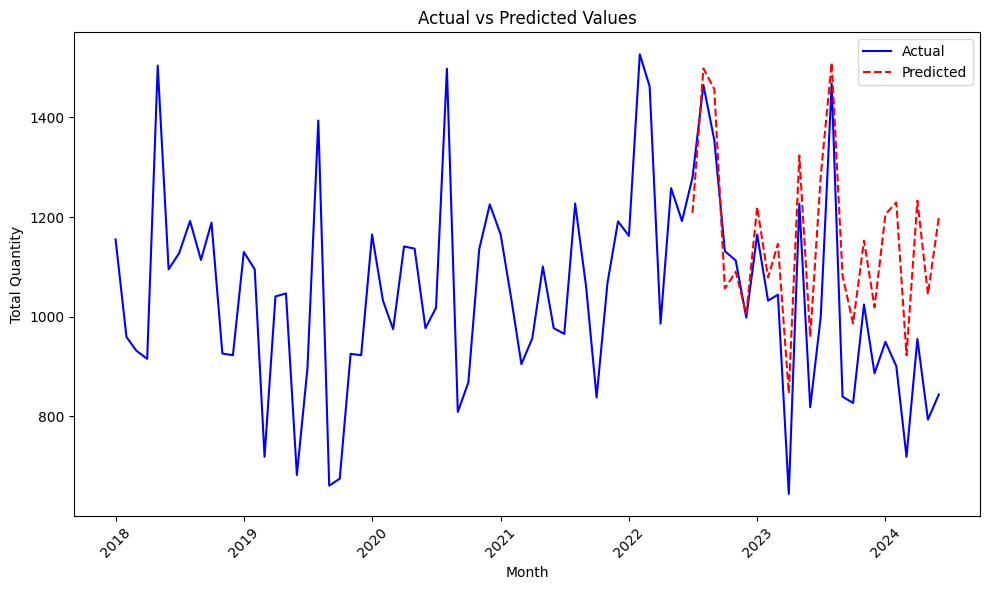

In [155]:
plt.figure(figsize=(10, 6))
plt.plot(lentil_data3['month'][:len(y)], y, label='Actual', color='blue')
plt.plot(lentil_data3['month'][len(X_train):], y_pred_lr, label='Predicted', color='red', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Actual vs Predicted Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

##AdaBoost Regressor

In [156]:
df_capped_lentils

,month,total_quantity,total_amount,year,quarter
26,2018-01-01,1155.215,88037.65000,2018,1
19,2018-02-01,959.500,71576.10000,2018,1
46,2018-03-01,931.910,76926.93000,2018,1
0,2018-04-01,915.590,73561.58000,2018,2
53,2018-05-01,1504.076,121937.83561,2018,2
...,...,...,...,...,...
25,2024-02-01,900.713,100275.94000,2024,1
52,2024-03-01,718.860,68871.85000,2024,1
6,2024-04-01,955.450,102283.50000,2024,2
59,2024-05-01,793.620,83012.10505,2024,2


In [157]:
lentils_data_ada = df_capped_lentils.copy()

In [158]:
lentils_data_ada['rolling_mean2'] = lentils_data_ada['total_quantity'].rolling(window=2).mean()

In [159]:
# Create new columns for moving averages of each month
for i in range(1, 3):
    lentils_data_ada[f'moving_average_{i}'] = lentils_data_ada['total_quantity'].shift(i)

print(lentils_data_ada)

        month  total_quantity  total_amount  year  quarter  rolling_mean2  \
26 2018-01-01        1155.215   88037.65000  2018        1            NaN   
19 2018-02-01         959.500   71576.10000  2018        1      1057.3575   
46 2018-03-01         931.910   76926.93000  2018        1       945.7050   
0  2018-04-01         915.590   73561.58000  2018        2       923.7500   
53 2018-05-01        1504.076  121937.83561  2018        2      1209.8330   
..        ...             ...           ...   ...      ...            ...   
25 2024-02-01         900.713  100275.94000  2024        1       925.1780   
52 2024-03-01         718.860   68871.85000  2024        1       809.7865   
6  2024-04-01         955.450  102283.50000  2024        2       837.1550   
59 2024-05-01         793.620   83012.10505  2024        2       874.5350   
45 2024-06-01         844.157   98884.19554  2024        2       818.8885   

    moving_average_1  moving_average_2  
26               NaN              

In [160]:
lentils_data_ada.dropna(inplace=True)

In [161]:
lentils_data_ada.shape

(76, 8)

In [162]:
# Split data into features (X) and target variable (y)
X = lentils_data_ada.drop(['month', 'total_quantity'], axis=1)
y = lentils_data_ada['total_quantity']

In [163]:
adaboost = AdaBoostRegressor()

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [165]:
adaboost.fit(X_train, y_train)

AdaBoostRegressor()

In [166]:
adaboost_pred = adaboost.predict(X_test)

In [167]:
lentils_mae_ada3 = mean_absolute_error(y_test, adaboost_pred)
lentils_mape_ada3 = mean_absolute_percentage_error(y_test, adaboost_pred)
lentils_rmse_ada3 = np.sqrt(mean_squared_error(y_test,adaboost_pred))

lentils_r_squared_ada3 = r2_score(y_test, adaboost_pred)


# Display test and predicted values
print("Test Values:\n", y_test.values)
print("Predicted Values:\n", adaboost_pred,"\n")
print("MAE:", lentils_mae_ada3)
print("MAPE:", lentils_mape_ada3*100)
print("RMSE:", lentils_rmse_ada3)
print("R-square:", lentils_r_squared_ada3)

Test Values:
 [1465.105      1354.378      1131.67       1112.96        998.24
 1165.         1032.33       1044.20738462  644.45       1226.75
  818.45       1000.543      1467.782       839.565       827.03
 1024.556       886.45        949.643       900.713       718.86
  955.45        793.62        844.157     ]
Predicted Values:
 [1497.782      1497.782      1156.20323529 1165.91018182 1043.60546667
 1154.42171429 1118.6665     1068.3126087   814.794      1005.75910526
  959.42125    1002.7844     1480.57234375 1137.14666667  973.59033333
 1014.78036842 1020.50631579 1005.75910526 1010.52954545  823.485
  979.2869      995.36408333  977.20966667] 

MAE: 94.9762187020211
MAPE: 10.617848709925948
RMSE: 122.71689630885241
R-square: 0.6730915476425801


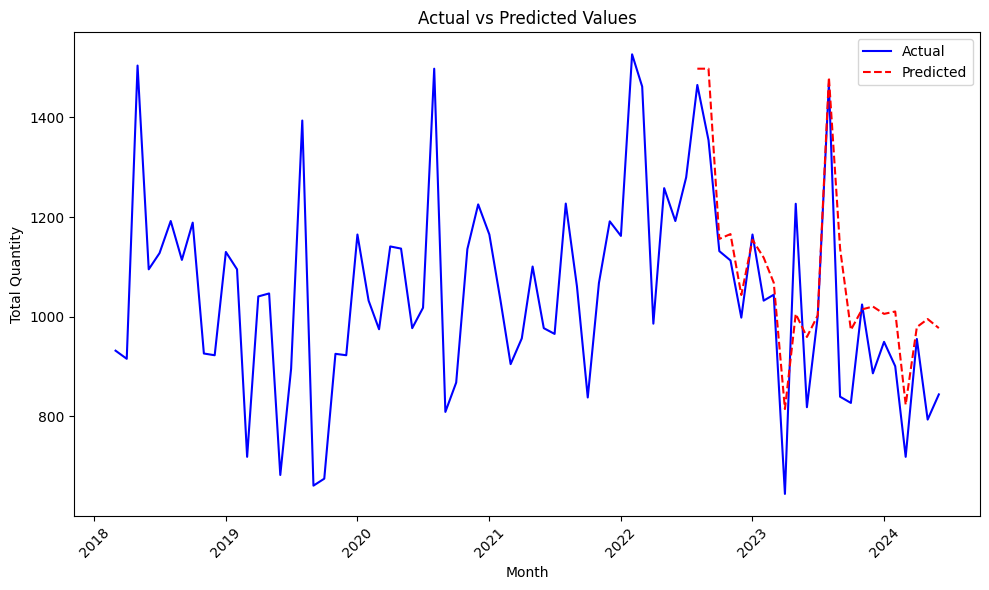

In [168]:
plt.figure(figsize=(10, 6))
plt.plot(lentils_data_ada['month'], y, label='Actual', color='blue')
plt.plot(lentils_data_ada['month'][len(X_train):], adaboost_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Actual vs Predicted Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

##XG boost Regressor


In [169]:
lentils_data_xgb = df_capped_lentils.copy()

In [170]:
lentils_data_xgb['rolling_mean2'] = lentils_data_xgb['total_quantity'].rolling(window=2).mean()

In [171]:
# Create new columns for moving averages of each month
for i in range(1, 2):
    lentils_data_xgb[f'moving_average_{i}'] = lentils_data_xgb['total_quantity'].shift(i)

print(lentils_data_xgb)

        month  total_quantity  total_amount  year  quarter  rolling_mean2  \
26 2018-01-01        1155.215   88037.65000  2018        1            NaN   
19 2018-02-01         959.500   71576.10000  2018        1      1057.3575   
46 2018-03-01         931.910   76926.93000  2018        1       945.7050   
0  2018-04-01         915.590   73561.58000  2018        2       923.7500   
53 2018-05-01        1504.076  121937.83561  2018        2      1209.8330   
..        ...             ...           ...   ...      ...            ...   
25 2024-02-01         900.713  100275.94000  2024        1       925.1780   
52 2024-03-01         718.860   68871.85000  2024        1       809.7865   
6  2024-04-01         955.450  102283.50000  2024        2       837.1550   
59 2024-05-01         793.620   83012.10505  2024        2       874.5350   
45 2024-06-01         844.157   98884.19554  2024        2       818.8885   

    moving_average_1  
26               NaN  
19          1155.215  
46    

In [172]:
lentils_data_xgb.dropna(inplace=True)

In [173]:
lentils_data_xgb.shape

(77, 7)

In [174]:
# Split data into features (X) and target variable (y)
X = lentils_data_xgb.drop(['month', 'total_quantity'], axis=1)
y = lentils_data_xgb['total_quantity']

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [176]:
xgb = XGBRFRegressor()

In [177]:
xgb.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [178]:
xgb_pred = xgb.predict(X_test)

In [179]:
lentils_mae_xgb3 = mean_absolute_error(y_test, xgb_pred)
lentils_mape_xgb3 = mean_absolute_percentage_error(y_test, xgb_pred)
lentils_rmse_xgb3 = np.sqrt(mean_squared_error(y_test,xgb_pred))

lentils_r_squared_xgb3 = r2_score(y_test, xgb_pred)


# Display test and predicted values
print("Test Values:\n", y_test.values)
print("Predicted Values:\n", xgb_pred,"\n")
print("MAE:", lentils_mae_xgb3)
print("MAPE:", lentils_mape_xgb3*100)
print("RSME:", lentils_rmse_xgb3)
print("R square:", lentils_r_squared_xgb3)

Test Values:
 [1279.69       1465.105      1354.378      1131.67       1112.96
  998.24       1165.         1032.33       1044.20738462  644.45
 1226.75        818.45       1000.543      1467.782       839.565
  827.03       1024.556       886.45        949.643       900.713
  718.86        955.45        793.62        844.157     ]
Predicted Values:
 [1187.6788  1479.2444  1485.7635  1180.67    1199.9703  1066.0004
 1173.2216  1039.7933  1087.7661   813.7142  1040.2709   928.7306
 1014.34546 1477.9043  1152.7965   994.3471  1019.1612  1025.6787
 1016.93396 1017.0814   830.83826  964.3733  1035.8204   966.1065 ] 

MAE: 95.18258822240584
MAPE: 10.610645077047689
RSME: 123.85064440138704
R square: 0.6741753549879778


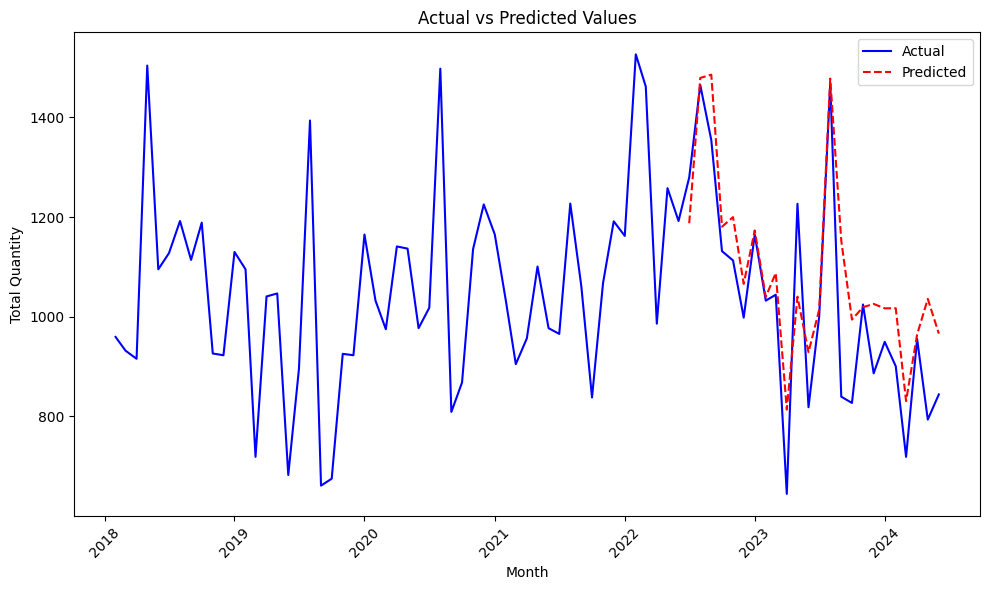

In [180]:
plt.figure(figsize=(10, 6))
plt.plot(lentils_data_xgb['month'], y, label='Actual', color='blue')
plt.plot(lentils_data_xgb['month'][len(X_train):], xgb_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Actual vs Predicted Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

##Random Forest

In [181]:
lentils_data_rf = df_capped_lentils.copy()

In [182]:
lentils_data_rf['rolling_mean2'] = lentils_data_rf['total_quantity'].rolling(window=2).mean()

In [183]:
# Create new columns for moving averages of each month
for i in range(1, 2):
    lentils_data_rf[f'moving_average_{i}'] = lentils_data_rf['total_quantity'].shift(i)

print(lentils_data_rf)

        month  total_quantity  total_amount  year  quarter  rolling_mean2  \
26 2018-01-01        1155.215   88037.65000  2018        1            NaN   
19 2018-02-01         959.500   71576.10000  2018        1      1057.3575   
46 2018-03-01         931.910   76926.93000  2018        1       945.7050   
0  2018-04-01         915.590   73561.58000  2018        2       923.7500   
53 2018-05-01        1504.076  121937.83561  2018        2      1209.8330   
..        ...             ...           ...   ...      ...            ...   
25 2024-02-01         900.713  100275.94000  2024        1       925.1780   
52 2024-03-01         718.860   68871.85000  2024        1       809.7865   
6  2024-04-01         955.450  102283.50000  2024        2       837.1550   
59 2024-05-01         793.620   83012.10505  2024        2       874.5350   
45 2024-06-01         844.157   98884.19554  2024        2       818.8885   

    moving_average_1  
26               NaN  
19          1155.215  
46    

In [184]:
lentils_data_rf.dropna(inplace=True)

In [185]:
lentils_data_rf.shape

(77, 7)

In [186]:
# Split data into features (X) and target variable (y)
X = lentils_data_rf.drop(['month', 'total_quantity'], axis=1)
y = lentils_data_rf['total_quantity']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [188]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [189]:
y_pred_rf = rf_model.predict(X_test)

In [190]:
lentils_mae_rf = mean_absolute_error(y_test, y_pred_rf)
lentils_mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
lentils_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
lentils_r_sqaure_rf = r2_score(y_test, y_pred_rf)

# Display test and predicted values
print("Test Values:\n", y_test.values)
print("Predicted Values:\n", y_pred_rf,"\n")
print("MAE:", lentils_mae_rf)
print("MAPE:", lentils_mape_rf*100)
print("RMSE:", lentils_rmse_rf)
print("R-Square:", lentils_r_sqaure_rf)

Test Values:
 [1279.69       1465.105      1354.378      1131.67       1112.96
  998.24       1165.         1032.33       1044.20738462  644.45
 1226.75        818.45       1000.543      1467.782       839.565
  827.03       1024.556       886.45        949.643       900.713
  718.86        955.45        793.62        844.157     ]
Predicted Values:
 [1193.45089375 1482.6105775  1474.67724875 1183.92900375 1200.29673
 1044.06308    1191.76792    1099.69306    1110.2908      795.2642
 1060.17315125  952.17878    1011.65676    1470.7416625  1141.77436
 1004.58411    1027.32462    1008.54565    1033.02629    1027.60958
  810.97075     992.67502    1013.40909    1004.81702   ] 

MAE: 98.31512012019277
MAPE: 10.894550820740847
RMSE: 122.06883624950973
R-Square: 0.6834830311382125


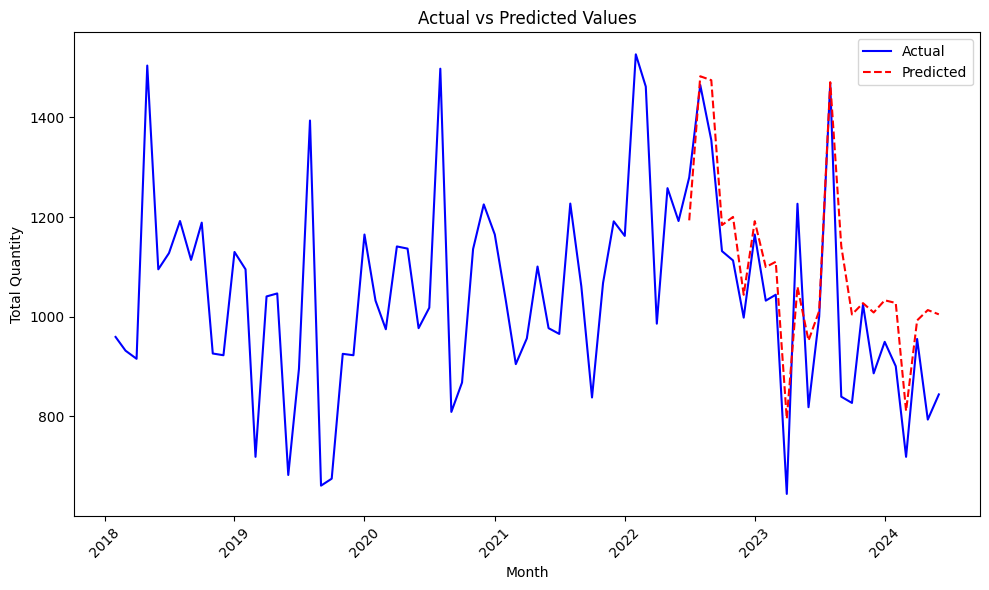

In [191]:
plt.figure(figsize=(10, 6))
plt.plot(lentils_data_rf['month'], y, label='Actual', color='blue')
plt.plot(lentils_data_rf['month'][len(X_train):], y_pred_rf, label='Predicted', color='red', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Actual vs Predicted Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

##Metric Evaluations

In [192]:
data_lentils = {
    'Metric': ['Lentils-MAE', 'Lentils-MAPE', 'Lentils-RMSE', 'Lentils-R-Square'],
    'Linear Regression': [lentils_mae_lr, lentils_mape_lr*100,lentils_rmse_lr,lentils_r_sqaure_lr],
    'ADA Boost':[lentils_mae_ada3,lentils_mape_ada3*100,lentils_rmse_ada3,lentils_r_squared_ada3],
    'XG Boost':[lentils_mae_xgb3,lentils_mape_xgb3*100,lentils_rmse_xgb3,lentils_r_squared_xgb3],
    'Random Forest': [lentils_mae_rf, lentils_mape_rf*100,lentils_rmse_rf,lentils_r_sqaure_rf],
    # 'Simple RNN': [lentils_mae_rnn, lentils_mape_rnn*100,lentils_rmse_rnn,lentils_r_sqaure_rnn],
    # 'LSTM': [lentils_mae_lstm, lentils_mape_lstm*100,lentils_rmse_lstm,lentils_r_sqaure_lstm]
}

# Create the DataFrame from the dictionary
df_lentils = pd.DataFrame(data_lentils)

print(df_lentils.to_string(columns=['Metric', 'Linear Regression', 'ADA Boost', 'XG Boost', 'Random Forest'], header=True))
# print(df_lentils.to_string(columns=['Metric', 'Linear Regression', 'ADA Boost', 'XG Boost', 'Random Forest', 'Simple RNN', 'LSTM'], header=True))

             Metric  Linear Regression   ADA Boost    XG Boost  Random Forest
0       Lentils-MAE         150.716568   94.976219   95.182588      98.315120
1      Lentils-MAPE          16.741817   10.617849   10.610645      10.894551
2      Lentils-RMSE         181.493237  122.716896  123.850644     122.068836
3  Lentils-R-Square           0.300306    0.673092    0.674175       0.683483


In [193]:
combined_df = pd.concat([df_rice, df_oil, df_lentils], ignore_index=True)
combined_df
# print(tabulate(combined_df, headers='keys', tablefmt='grid'))

,Metric,Linear Regression,ADA Boost,XG Boost,Random Forest
0,Rice-MAE,765.796581,398.185416,379.719133,397.129278
1,Rice-MAPE,25.281323,16.134756,14.546495,15.278572
2,Rice-RMSE,881.340142,555.567314,498.710365,512.947748
3,Rice-R-Square,0.378950,0.738720,0.804097,0.792752
4,Oil-MAE,71.070281,54.806985,55.036576,51.709218
5,Oil-MAPE,9.861019,7.402862,7.423783,6.704610
6,Oil-RMSE,85.562279,82.279836,77.784040,76.331116
7,Oil-R-square,0.732805,0.752913,0.779177,0.787349
8,Lentils-MAE,150.716568,94.976219,95.182588,98.315120
9,Lentils-MAPE,16.741817,10.617849,10.610645,10.894551


In [194]:
all_data = pd.concat([
    monthly_rice_sales_summary.assign(category='Rice'),
    monthly_oil_sales_summary.assign(category='Oils'),
    monthly_lentils_sales_summary.assign(category='Lentils')
], ignore_index=True)

# Display the combined DataFrame
print(all_data)

         month  total_quantity  total_amount  year  quarter  month_num  \
0   2018-01-01        3580.750  180767.50000  2018        1        1.0   
1   2018-02-01        2775.850  147303.70000  2018        1        2.0   
2   2018-03-01        2957.040  153031.46000  2018        1        3.0   
3   2018-04-01        4032.220  201134.98000  2018        2        4.0   
4   2018-05-01        4935.050  251761.92100  2018        2        5.0   
..         ...             ...           ...   ...      ...        ...   
229 2024-02-01         900.713  100275.94000  2024        1        NaN   
230 2024-03-01         718.860   68871.85000  2024        1        NaN   
231 2024-04-01         955.450  102283.50000  2024        2        NaN   
232 2024-05-01         793.620   83012.10505  2024        2        NaN   
233 2024-06-01         844.157   98884.19554  2024        2        NaN   

    month_name category  
0      January     Rice  
1     February     Rice  
2        March     Rice  
3      

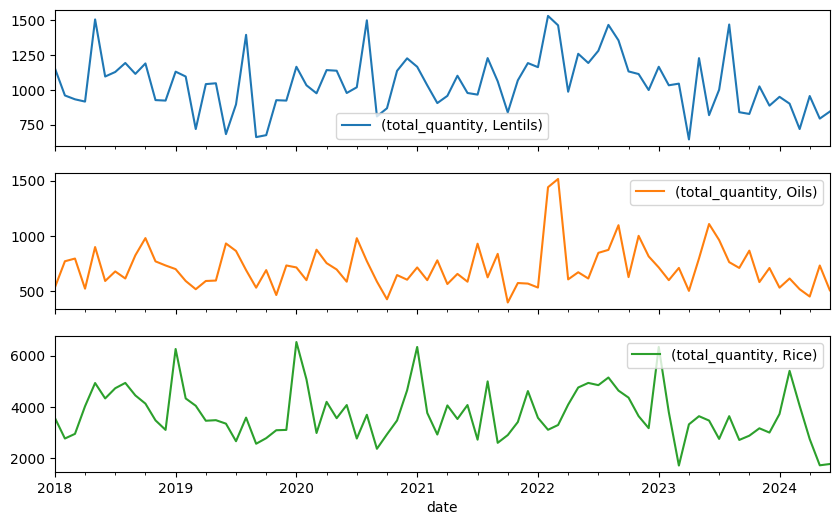

In [195]:
# Assuming there's a 'date' column in datetime format for monthly sales
all_data['date'] = pd.to_datetime(all_data['month'])
all_data.set_index('date', inplace=True)

# Monthly sales trends
monthly_trends = all_data.groupby(['category', pd.Grouper(freq='M')]).agg({
    'total_quantity': 'sum',
}).unstack(level=0)
monthly_trends.plot(subplots=True, figsize=(10, 6))
plt.show()


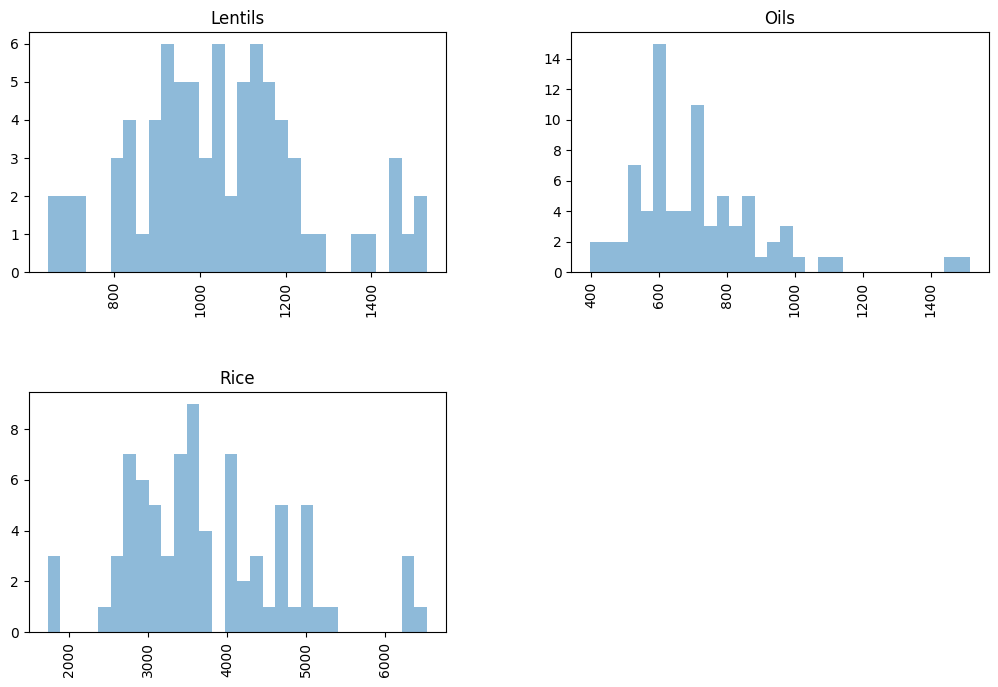

In [196]:
# Histogram for sales quantity
all_data['total_quantity'].hist(by=all_data['category'], bins=30, alpha=0.5, figsize=(12, 8))
plt.show()

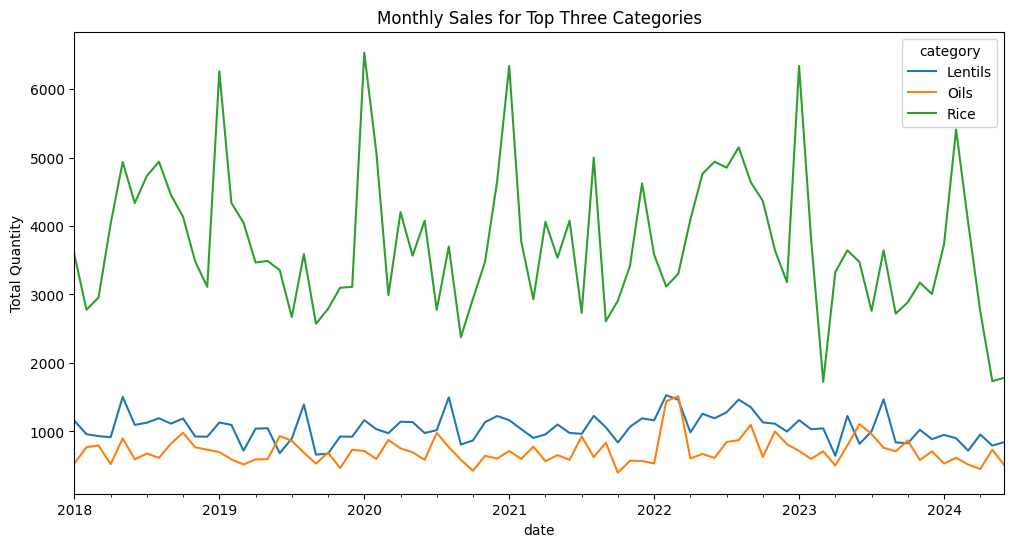

In [197]:
# Time Series plot for total quantity
all_data.pivot_table(values='total_quantity', index='date', columns='category', aggfunc='sum').plot(figsize=(12, 6))
plt.title('Monthly Sales for Top Three Categories')
plt.ylabel('Total Quantity')
plt.show()


In [198]:
# Contribution to total sales
total_sales = all_data.groupby('category')['total_amount'].sum()
total_sales_percentage = (total_sales / total_sales.sum()) * 100
print(total_sales_percentage)


category
Lentils    21.427930
Oils       27.831065
Rice       50.741006
Name: total_amount, dtype: float64


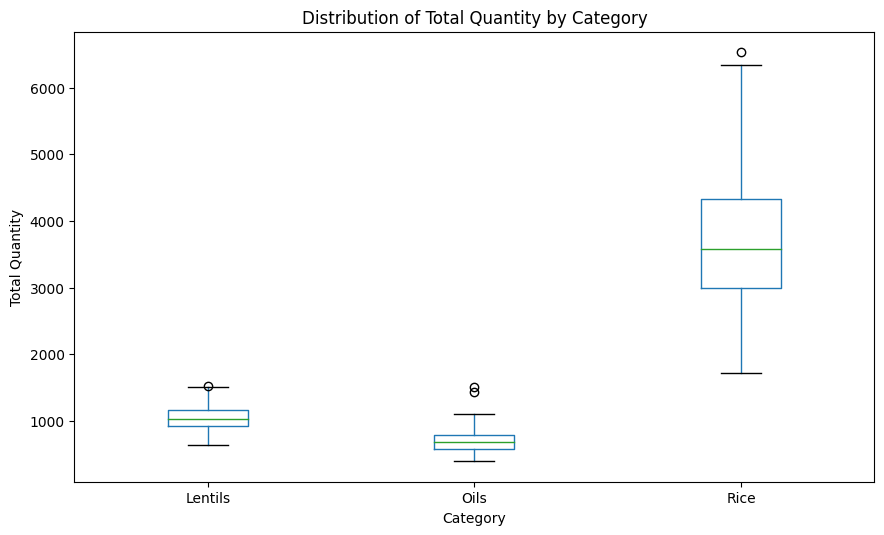

In [199]:
all_data.boxplot(by='category', column=['total_quantity'], grid=False, figsize=(10, 6))
plt.suptitle('')  # Clears the super title
# Adding a title to the plot
plt.title('Distribution of Total Quantity by Category')

# Adding labels for x-axis and y-axis
plt.xlabel('Category')  # Since grouping is by category, x-axis represents the categories
plt.ylabel('Total Quantity')  # Represents the data being plotted

# Display the plot
plt.show()